# Example pipeline for easier usage


### SETUP

In [ ]:
# Clone my github repositories for the necessary modules
!git clone https://github.com/Najlaron/PySPRESSO
!git clone https://github.com/Najlaron/pdf_reporter

# Install other necessary modules
%pip install reportlab
%pip install PyPDF2
%pip install combat

Cloning into 'PySPRESSO'...
remote: Enumerating objects: 254, done.
remote: Counting objects: 100% (166/166), done.
remote: Compressing objects: 100% (132/132), done.
remote: Total 254 (delta 112), reused 34 (delta 34), pack-reused 88 (from 1)
Receiving objects: 100% (254/254), 17.10 MiB | 9.29 MiB/s, done.
Resolving deltas: 100% (140/140), done.
Cloning into 'pdf_reporter'...
remote: Enumerating objects: 20, done.
remote: Counting objects: 100% (20/20), done.
remote: Compressing objects: 100% (20/20), done.
remote: Total 20 (delta 8), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (20/20), 21.98 KiB | 3.66 MiB/s, done.
Resolving deltas: 100% (8/8), done.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 41.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.6/232.6 kB 12.4 MB/s eta 0:00:00


In [2]:
import PySPRESSO.PySPRESSO as presso
import pdf_reporter.pdf_reporter as pdf_rptr

wf = presso.Workflow()

### Upload your files into Files (on the left)

## Change things in the following cell according to your data and settings

In [3]:
# You can change the names and paths to the files here, but there are also demo_data

demo_data = 'https://raw.githubusercontent.com/Najlaron/PySPRESSO/main/demo_data.csv'
demo_batch_info = 'https://raw.githubusercontent.com/Najlaron/PySPRESSO/main/demo_data_batch_info.csv'

# Names
name = "Demo_data-POS" # Name of the workflow
main_folder = "Demo_data-POS_analysis" # Name of the main folder
report_file_name = "Demo_data-POS-report" # Name of the report file
output_file_prefix = "Demo_data-POS" # Prefix for the output files
# Choose if you want the report to be for proccessing or statistics (for both use either one - just a visual difference)
report_type = "processing" # or "statistics"


# Paths to the data files UPLOAD YOUR FILES INTO COLAB (ON THE LEFT) OR TRY DEMO ON OUR FILES
data_input_file_name = demo_data # Path to the data file
batch_info_input_file_name = demo_batch_info # Path to the batch info file


# Incorporating the changes
wf.set_name(name)
wf.set_main_folder(main_folder)
wf.set_report_file_name(report_file_name)
wf.initializer_report(report_type = report_type)
wf.initializer_folders()
wf.set_output_file_prefix(output_file_prefix)

Workflow name set to: Demo_data-POS
Main folder set.
Report file name set.
Report initialized.
Folders initialized.
Output file prefix set.


## Loading the data

#### Change the parameters if error occurs or you want different settings

In [4]:
# Load data
wf.loader_data(data_input_file_name, separator = ';', encoding = 'UTF-8')

# Add cpdID
wf.add_cpdID(mz_col = 'm/z', rt_col = 'RT [min]')

# Extract variable metadata from the data by choosing specific columns
wf.extracter_variable_metadata(column_index_ranges = [(10, 15), (18, 23)])

# Extract numerical data from the data by choosing columns starting with prefix
wf.extracter_data(prefix = 'Area:')

# Load batch info
wf.loader_batch_info(batch_info_input_file_name)

# Reorder data based on the creation date in the batch info file;
# distinguisher is something in the name of the file after which a name or number of the batch follows
wf.batch_by_name_reorder(distinguisher = None, format='%d.%m.%Y %H:%M')

# Extract metadata from batch info by choosing specific columns
group_columns_to_keep = ['Type', 'Type 2']
# columns such Study File ID, File Name, Creation Date, Sample Type, ... are always kept
wf.extracter_metadata(group_columns_to_keep, prefix = 'Area:')

print()

Data loaded.
Compound ID was added to the data
Variable metadata was extracted from the data.
Important columns were kept in the data and rest filtered out.
Batch info loaded.
New data order based on batch info:
['Area:(F7)', 'Area:(F97)', 'Area:(F98)', 'Area:(F48)', 'Area:(F2)', 'Area:(F11)', 'Area:(F72)', 'Area:(F66)', 'Area:(F53)', 'Area:(F99)', 'Area:(F46)', 'Area:(F64)', 'Area:(F75)', 'Area:(F31)', 'Area:(F12)', 'Area:(F36)', 'Area:(F100)', 'Area:(F85)', 'Area:(F41)', 'Area:(F9)', 'Area:(F82)', 'Area:(F33)', 'Area:(F45)', 'Area:(F101)', 'Area:(F54)', 'Area:(F74)', 'Area:(F63)', 'Area:(F30)', 'Area:(F71)', 'Area:(F68)', 'Area:(F102)', 'Area:(F10)', 'Area:(F56)', 'Area:(F86)', 'Area:(F47)', 'Area:(F73)', 'Area:(F14)', 'Area:(F103)', 'Area:(F35)', 'Area:(F59)', 'Area:(F62)', 'Area:(F65)', 'Area:(F77)', 'Area:(F39)', 'Area:(F104)', 'Area:(F57)', 'Area:(F80)', 'Area:(F52)', 'Area:(F70)', 'Area:(F4)', 'Area:(F67)', 'Area:(F105)', 'Area:(F6)', 'Area:(F40)', 'Area:(F37)', 'Area:(F83)', 'A

## Showing all the data matrices

In [5]:
wf.data

,cpdID,Area:(F7),Area:(F97),Area:(F98),Area:(F48),Area:(F2),Area:(F11),Area:(F72),Area:(F66),Area:(F53),...,Area:(F61),Area:(F5),Area:(F81),Area:(F109),Area:(F42),Area:(F43),Area:(F44),Area:(F110),Area:(F111),Area:(F8)
0,M138.05472-T5.829,1.487941e+07,2.135956e+09,2.014839e+09,2.138310e+09,1.134139e+09,2.172048e+09,1.957423e+09,2.446298e+09,2.236703e+09,...,2.381401e+09,2.005137e+09,1.950669e+09,2.012068e+09,3.681834e+09,3.850500e+09,3.520632e+09,2.126048e+09,2.154301e+09,2.313382e+06
1,M195.08733-T0.759,2.836050e+06,6.730272e+08,7.150877e+08,6.083020e+08,6.707446e+08,8.147524e+08,7.290234e+08,9.732532e+08,5.258038e+08,...,1.010843e+09,4.795502e+07,7.321129e+08,6.660449e+08,1.661893e+09,1.602658e+09,1.545228e+09,7.065315e+08,6.997258e+08,4.962972e+05
2,M195.08728-T0.765,2.832966e+06,7.224195e+08,6.663171e+08,6.296461e+08,7.592160e+08,7.664590e+08,7.491594e+08,9.909759e+08,5.083185e+08,...,1.033011e+09,4.848064e+07,7.630803e+08,6.492501e+08,1.466821e+09,1.489799e+09,1.534312e+09,6.534750e+08,6.337872e+08,5.239204e+05
3,M195.08735-T0.756,2.796890e+06,6.794977e+08,6.521187e+08,6.124841e+08,7.170563e+08,7.511934e+08,8.032227e+08,1.016119e+09,5.054313e+08,...,1.015388e+09,4.811784e+07,6.829622e+08,6.844992e+08,1.490335e+09,1.642771e+09,1.559223e+09,6.712125e+08,6.510647e+08,4.739487e+05
4,M94.065-T3.744,3.316189e+06,9.027335e+08,7.904249e+08,6.849016e+08,9.512551e+08,1.723776e+08,7.198670e+08,3.568669e+08,8.750725e+08,...,3.172212e+08,8.945106e+08,1.019567e+09,7.886862e+08,1.193924e+09,1.449528e+09,8.554574e+08,7.746920e+08,7.561196e+08,4.326626e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6126,M304.05735-T5.213,3.140281e+03,9.079104e+03,6.885218e+03,8.698976e+03,9.809518e+03,5.532877e+03,2.995845e+04,4.560984e+03,6.658792e+03,...,5.005875e+03,8.026930e+03,6.814009e+03,7.697237e+03,2.098244e+04,1.204023e+04,3.223052e+04,7.134463e+03,7.059626e+03,2.401881e+03
6127,M338.20679-T5.189,2.534832e+03,9.595846e+03,1.223461e+04,7.229503e+03,8.462566e+03,3.989782e+04,8.696034e+03,4.167890e+03,1.499741e+04,...,4.293920e+03,6.780731e+03,7.263439e+03,1.234322e+04,4.715213e+03,5.173352e+03,4.864645e+03,5.789090e+03,7.441270e+03,2.089746e+03
6128,M617.41728-T0.628,7.379487e+03,7.483518e+03,7.208541e+03,8.844352e+03,9.912880e+03,3.838451e+04,1.052415e+04,9.718462e+03,6.578910e+03,...,8.140537e+03,7.785223e+03,1.123758e+04,9.156622e+03,1.014029e+04,1.011360e+04,9.712230e+03,8.736084e+03,7.432165e+03,1.196152e+04
6129,M615.40092-T0.627,7.486081e+03,6.547695e+03,7.463598e+03,8.322725e+03,6.372821e+03,2.090855e+04,1.308423e+04,9.832109e+03,6.297466e+03,...,7.162957e+03,7.363450e+03,7.174120e+03,8.516390e+03,9.363581e+03,9.156519e+03,9.470356e+03,7.734153e+03,6.897728e+03,1.202951e+04


In [6]:
wf.metadata

,Study File ID,File Name,Creation Date,Sample Type,Polarity,Batch,Type,Type 2,Sample File
0,F7,D:\Projects_Orbitrap_Elite\User_name\Project_n...,2022-03-24 16:46:00,Blank,POS,all_one_batch,Blank,Blank,Area:(F7)
1,F97,D:\Projects_Orbitrap_Elite\User_name\Project_n...,2022-03-24 19:41:00,Quality Control,POS,all_one_batch,QC-IS,QC,Area:(F97)
2,F98,D:\Projects_Orbitrap_Elite\User_name\Project_n...,2022-03-24 19:56:00,Quality Control,POS,all_one_batch,QC-IS,QC,Area:(F98)
3,F48,D:\Projects_Orbitrap_Elite\User_name\Project_n...,2022-03-24 20:12:00,Sample,POS,all_one_batch,Type 1,Class 0,Area:(F48)
4,F2,D:\Projects_Orbitrap_Elite\User_name\Project_n...,2022-03-24 20:27:00,Sample,POS,all_one_batch,Type 1,Class 2,Area:(F2)
...,...,...,...,...,...,...,...,...,...
81,F43,D:\Projects_Orbitrap_Elite\User_name\Project_n...,2022-03-25 16:18:00,Sample,POS,all_one_batch,Type 0,Class 6,Area:(F43)
82,F44,D:\Projects_Orbitrap_Elite\User_name\Project_n...,2022-03-25 16:33:00,Sample,POS,all_one_batch,Type 0,Class 6,Area:(F44)
83,F110,D:\Projects_Orbitrap_Elite\User_name\Project_n...,2022-03-25 16:49:00,Quality Control,POS,all_one_batch,QC-IS,QC,Area:(F110)
84,F111,D:\Projects_Orbitrap_Elite\User_name\Project_n...,2022-03-25 17:04:00,Quality Control,POS,all_one_batch,QC-IS,QC,Area:(F111)


In [7]:
wf.variable_metadata

,cpdID,Name,Formula,Annot. DeltaMass [ppm],Annotation MW,Calc. MW,m/z,RT [min],# mzVault Results,CSID,SMILES,InChI Key,mzCloud Best Match
0,M138.05472-T5.829,2-Hydroxybenzamide,C7 H7 N O2,-1.68,137.04768,137.04745,138.05472,5.829,0,4963.0,c1ccc(c(c1)C(=O)N)O,SKZKKFZAGNVIMN-UHFFFAOYSA-N,NaN
1,M195.08733-T0.759,Cafeine,C8 H10 N4 O2,-1.68,194.08038,194.08005,195.08733,0.759,0,NaN,NaN,NaN,NaN
2,M195.08728-T0.765,(Hexanoylamino)acetate,C8 H14 N O3,4.04,172.09737,172.09806,195.08728,0.765,0,1271264.0,CCCCCC(=O)NCC(=O)[O-],UPCKIPHSXMXJOX-UHFFFAOYSA-M,NaN
3,M195.08735-T0.756,NaN,NaN,NaN,NaN,156.12419,195.08735,0.756,0,NaN,NaN,NaN,NaN
4,M94.065-T3.744,Aniline,C6 H7 N,-1.38,93.05785,93.05772,94.06500,3.744,0,5889.0,c1ccc(cc1)N,PAYRUJLWNCNPSJ-UHFFFAOYSA-N,96.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6126,M304.05735-T5.213,Delphinidin,C15 H11 O7,-1.35,303.05048,303.05007,304.05735,5.213,0,114185.0,c1c(cc(c(c1O)O)O)c2c(cc3c(cc(cc3[o+]2)O)O)O,JKHRCGUTYDNCLE-UHFFFAOYSA-O,NaN
6127,M338.20679-T5.189,"N-(3,5-Dimethoxyphenyl)-3-[4-(2-hydroxyethyl)-...",C17 H27 N3 O4,-1.82,337.20016,337.19954,338.20679,5.189,0,628050.0,COc1cc(cc(c1)OC)NC(=O)CCN2CCN(CC2)CCO,WJXXLQYTSJZGOL-UHFFFAOYSA-N,NaN
6128,M617.41728-T0.628,"PA(12:0/18:2(9Z,12Z))",C33 H61 O8 P,-0.65,616.41041,616.41001,617.41728,0.628,0,NaN,NaN,NaN,NaN
6129,M615.40092-T0.627,"PA(12:0/18:3(6Z,9Z,12Z))",C33 H59 O8 P,-1.80,614.39476,614.39365,615.40092,0.627,0,NaN,NaN,NaN,NaN


In [8]:
wf.batch_info

,Study File ID,File Name,Creation Date,RT Range [min],Instrument Name,Software Revision,Alignment Score,Sample Type,Polarity,Replicates,Type,Type 2,Max. Mass [Da],Batch
0,F7,D:\Projects_Orbitrap_Elite\User_name\Project_n...,2022-03-24 16:46:00,0.00 - 14.00,Orbitrap Elite,2.7.0 SP2,0.637,Blank,POS,Support Samples,Blank,Blank,1050,all_one_batch
1,F97,D:\Projects_Orbitrap_Elite\User_name\Project_n...,2022-03-24 19:41:00,0.00 - 14.00,Orbitrap Elite,2.7.0 SP2,0.964,Quality Control,POS,Support Samples,QC-IS,QC,1050,all_one_batch
2,F98,D:\Projects_Orbitrap_Elite\User_name\Project_n...,2022-03-24 19:56:00,0.00 - 14.00,Orbitrap Elite,2.7.0 SP2,0.980,Quality Control,POS,Support Samples,QC-IS,QC,1050,all_one_batch
3,F48,D:\Projects_Orbitrap_Elite\User_name\Project_n...,2022-03-24 20:12:00,0.00 - 14.00,Orbitrap Elite,2.7.0 SP2,0.961,Sample,POS,2,Type 1,Class 0,1050,all_one_batch
4,F2,D:\Projects_Orbitrap_Elite\User_name\Project_n...,2022-03-24 20:27:00,0.00 - 14.00,Orbitrap Elite,2.7.0 SP2,0.925,Sample,POS,2,Type 1,Class 2,1050,all_one_batch
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81,F43,D:\Projects_Orbitrap_Elite\User_name\Project_n...,2022-03-25 16:18:00,0.00 - 14.00,Orbitrap Elite,2.7.0 SP2,0.733,Sample,POS,2,Type 0,Class 6,1050,all_one_batch
82,F44,D:\Projects_Orbitrap_Elite\User_name\Project_n...,2022-03-25 16:33:00,0.00 - 14.00,Orbitrap Elite,2.7.0 SP2,0.711,Sample,POS,3,Type 0,Class 6,1050,all_one_batch
83,F110,D:\Projects_Orbitrap_Elite\User_name\Project_n...,2022-03-25 16:49:00,0.00 - 14.00,Orbitrap Elite,2.7.0 SP2,0.853,Quality Control,POS,Support Samples,QC-IS,QC,1050,all_one_batch
84,F111,D:\Projects_Orbitrap_Elite\User_name\Project_n...,2022-03-25 17:04:00,0.00 - 14.00,Orbitrap Elite,2.7.0 SP2,0.855,Quality Control,POS,Support Samples,QC-IS,QC,1050,all_one_batch


## Setup QC samples and blank samples

### Change the distinguisher (label) or the column names, if necessary

In [9]:
# Define how the QC samples are distinguished from the rest of the samples
qc_samples_distinguisher = 'Quality Control'

# Get a list of the QC samples
QC_samples = wf.metadata[wf.metadata['Sample Type'] == qc_samples_distinguisher]['Sample File'].tolist()
# Save the list of QC samples
wf.set_QC_samples(QC_samples)

# ---------------------------------------------
# Repeat for the blank samples
blank_samples_distinguisher = 'Blank'

# Get a list of the blank samples
blank_samples = wf.metadata[wf.metadata['Sample Type'] == blank_samples_distinguisher]['Sample File'].tolist()
# Save the list of blank samples
wf.set_blank_samples(blank_samples)



QC samples set.
Blank samples set.


### Setup Batch labels, if you have more then one batch

In [10]:
# IF YOUR DATA INCLUDES BATCHES, RUN THIS CELL WITH PROPER CHANGES
# (if you dont have batches, you can skip this cell, or set it to None by running this line of code: wf.set_batch(None))

# Define the batches
column_name_in_batch_info = 'Batch'

# Get a list of the batches and filter out the None values
batch = wf.batch_info[column_name_in_batch_info].tolist()

# Filter out the None values
batch = [value for value in batch if value is not None]

# Add the batch info to the metadata
wf.metadata['Batch'] = batch

# Save the list of batches
wf.set_batch(batch)

Batch set.


# PROCESSING & ANALYSIS STEPS

#### Following cells represent the order of processing and analysis steps, that we use

#### Feel free to adjust the parameters or delete/drag cells to skip/change order of the steps

## PROCESSING

In [11]:
# Remove features with missing values above a certain threshold
wf.filter_missing_values(qc_threshold = 0.8, sample_threshold = 0.5)
# Show data
wf.data


Number of features removed for QC threshold (0.8%): within QC samples: 0 ;being: []
Number of features removed for sample threshold (0.5%): within all samples: 0 ;being: []


,cpdID,Area:(F7),Area:(F97),Area:(F98),Area:(F48),Area:(F2),Area:(F11),Area:(F72),Area:(F66),Area:(F53),...,Area:(F61),Area:(F5),Area:(F81),Area:(F109),Area:(F42),Area:(F43),Area:(F44),Area:(F110),Area:(F111),Area:(F8)
0,M138.05472-T5.829,1.487941e+07,2.135956e+09,2.014839e+09,2.138310e+09,1.134139e+09,2.172048e+09,1.957423e+09,2.446298e+09,2.236703e+09,...,2.381401e+09,2.005137e+09,1.950669e+09,2.012068e+09,3.681834e+09,3.850500e+09,3.520632e+09,2.126048e+09,2.154301e+09,2.313382e+06
1,M195.08733-T0.759,2.836050e+06,6.730272e+08,7.150877e+08,6.083020e+08,6.707446e+08,8.147524e+08,7.290234e+08,9.732532e+08,5.258038e+08,...,1.010843e+09,4.795502e+07,7.321129e+08,6.660449e+08,1.661893e+09,1.602658e+09,1.545228e+09,7.065315e+08,6.997258e+08,4.962972e+05
2,M195.08728-T0.765,2.832966e+06,7.224195e+08,6.663171e+08,6.296461e+08,7.592160e+08,7.664590e+08,7.491594e+08,9.909759e+08,5.083185e+08,...,1.033011e+09,4.848064e+07,7.630803e+08,6.492501e+08,1.466821e+09,1.489799e+09,1.534312e+09,6.534750e+08,6.337872e+08,5.239204e+05
3,M195.08735-T0.756,2.796890e+06,6.794977e+08,6.521187e+08,6.124841e+08,7.170563e+08,7.511934e+08,8.032227e+08,1.016119e+09,5.054313e+08,...,1.015388e+09,4.811784e+07,6.829622e+08,6.844992e+08,1.490335e+09,1.642771e+09,1.559223e+09,6.712125e+08,6.510647e+08,4.739487e+05
4,M94.065-T3.744,3.316189e+06,9.027335e+08,7.904249e+08,6.849016e+08,9.512551e+08,1.723776e+08,7.198670e+08,3.568669e+08,8.750725e+08,...,3.172212e+08,8.945106e+08,1.019567e+09,7.886862e+08,1.193924e+09,1.449528e+09,8.554574e+08,7.746920e+08,7.561196e+08,4.326626e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6126,M304.05735-T5.213,3.140281e+03,9.079104e+03,6.885218e+03,8.698976e+03,9.809518e+03,5.532877e+03,2.995845e+04,4.560984e+03,6.658792e+03,...,5.005875e+03,8.026930e+03,6.814009e+03,7.697237e+03,2.098244e+04,1.204023e+04,3.223052e+04,7.134463e+03,7.059626e+03,2.401881e+03
6127,M338.20679-T5.189,2.534832e+03,9.595846e+03,1.223461e+04,7.229503e+03,8.462566e+03,3.989782e+04,8.696034e+03,4.167890e+03,1.499741e+04,...,4.293920e+03,6.780731e+03,7.263439e+03,1.234322e+04,4.715213e+03,5.173352e+03,4.864645e+03,5.789090e+03,7.441270e+03,2.089746e+03
6128,M617.41728-T0.628,7.379487e+03,7.483518e+03,7.208541e+03,8.844352e+03,9.912880e+03,3.838451e+04,1.052415e+04,9.718462e+03,6.578910e+03,...,8.140537e+03,7.785223e+03,1.123758e+04,9.156622e+03,1.014029e+04,1.011360e+04,9.712230e+03,8.736084e+03,7.432165e+03,1.196152e+04
6129,M615.40092-T0.627,7.486081e+03,6.547695e+03,7.463598e+03,8.322725e+03,6.372821e+03,2.090855e+04,1.308423e+04,9.832109e+03,6.297466e+03,...,7.162957e+03,7.363450e+03,7.174120e+03,8.516390e+03,9.363581e+03,9.156519e+03,9.470356e+03,7.734153e+03,6.897728e+03,1.202951e+04


/content/PySPRESSO/PySPRESSO.py:2477: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


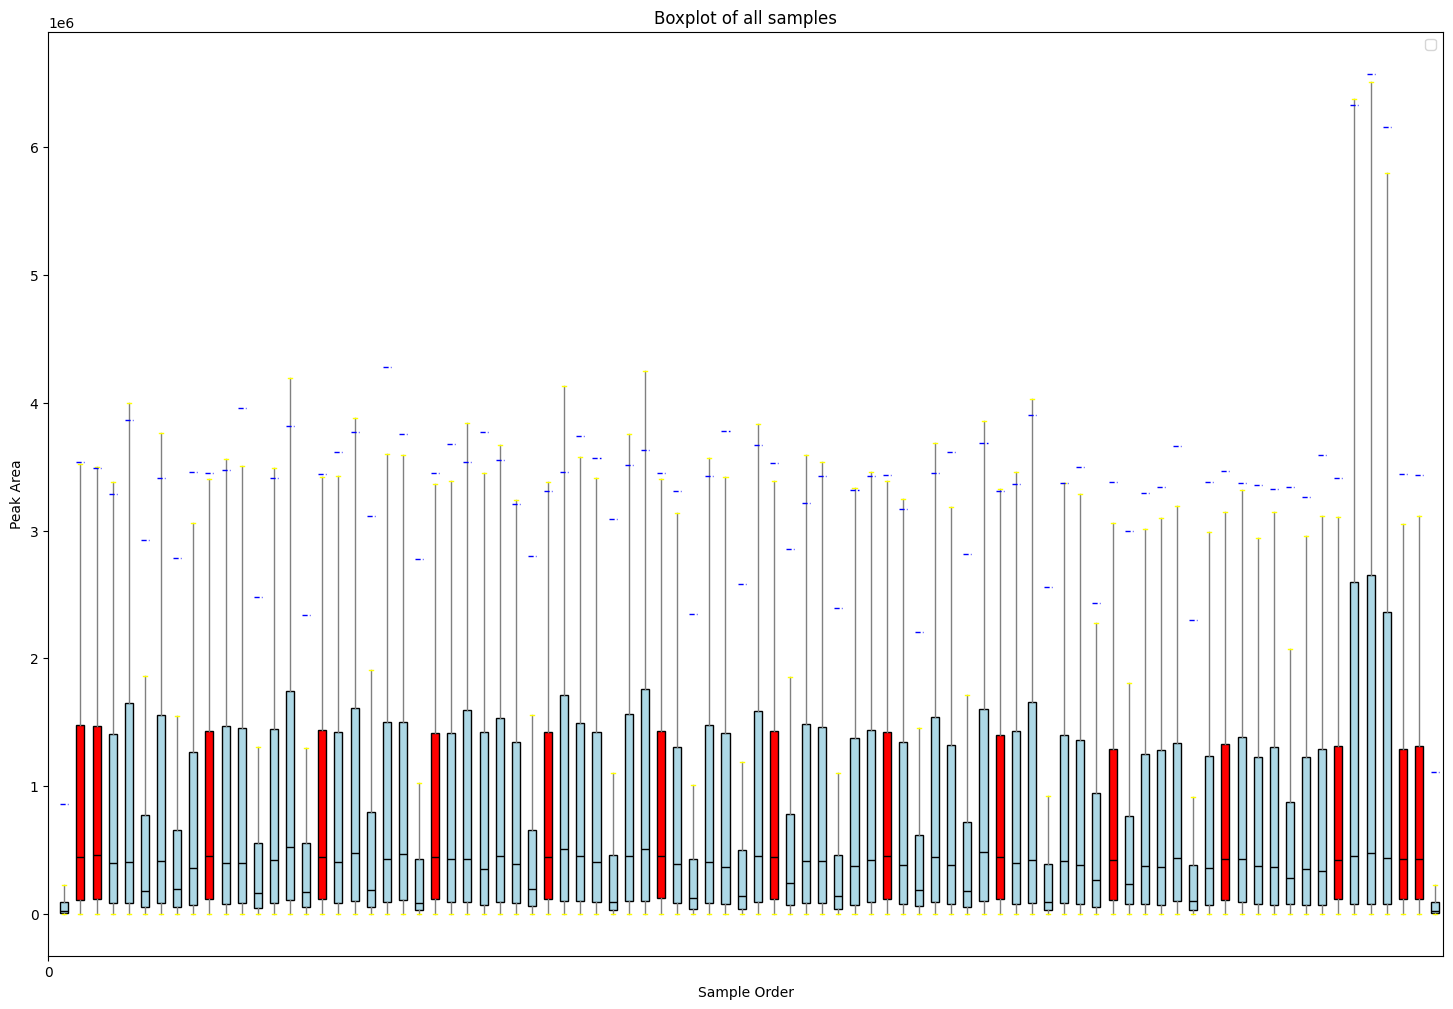

(<Figure size 1800x1200 with 1 Axes>,
 <Axes: title={'center': 'Boxplot of all samples'}, xlabel='Sample Order', ylabel='Peak Area'>)

In [12]:
# Visualize whole dataset as boxplot
wf.visualizer_boxplot()

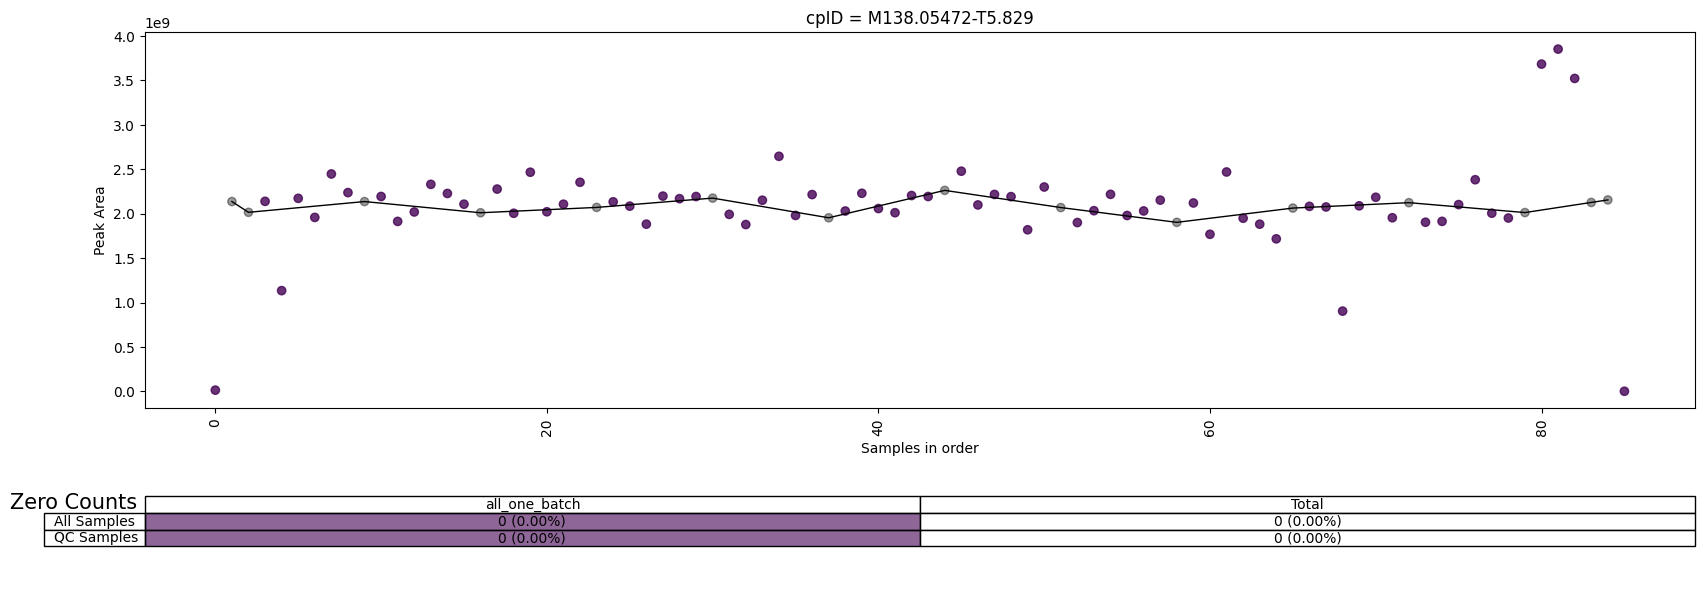

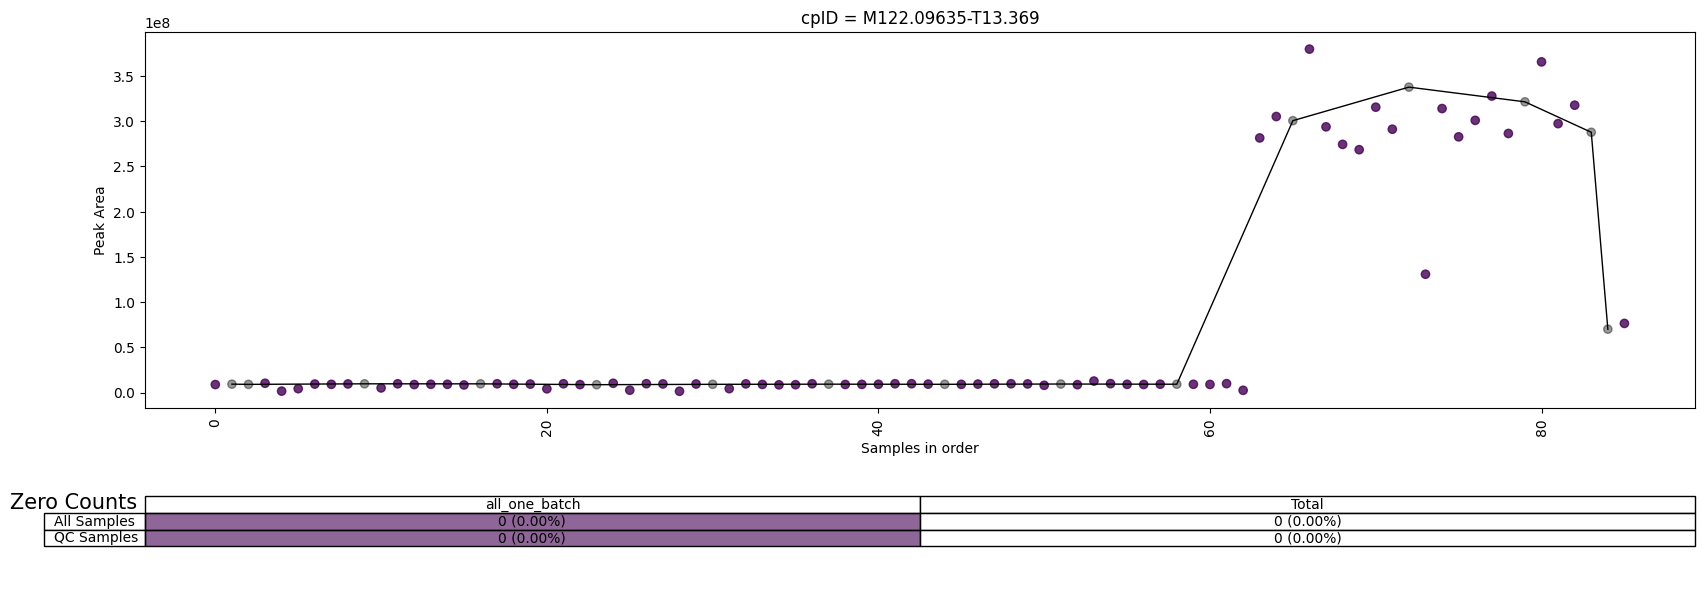

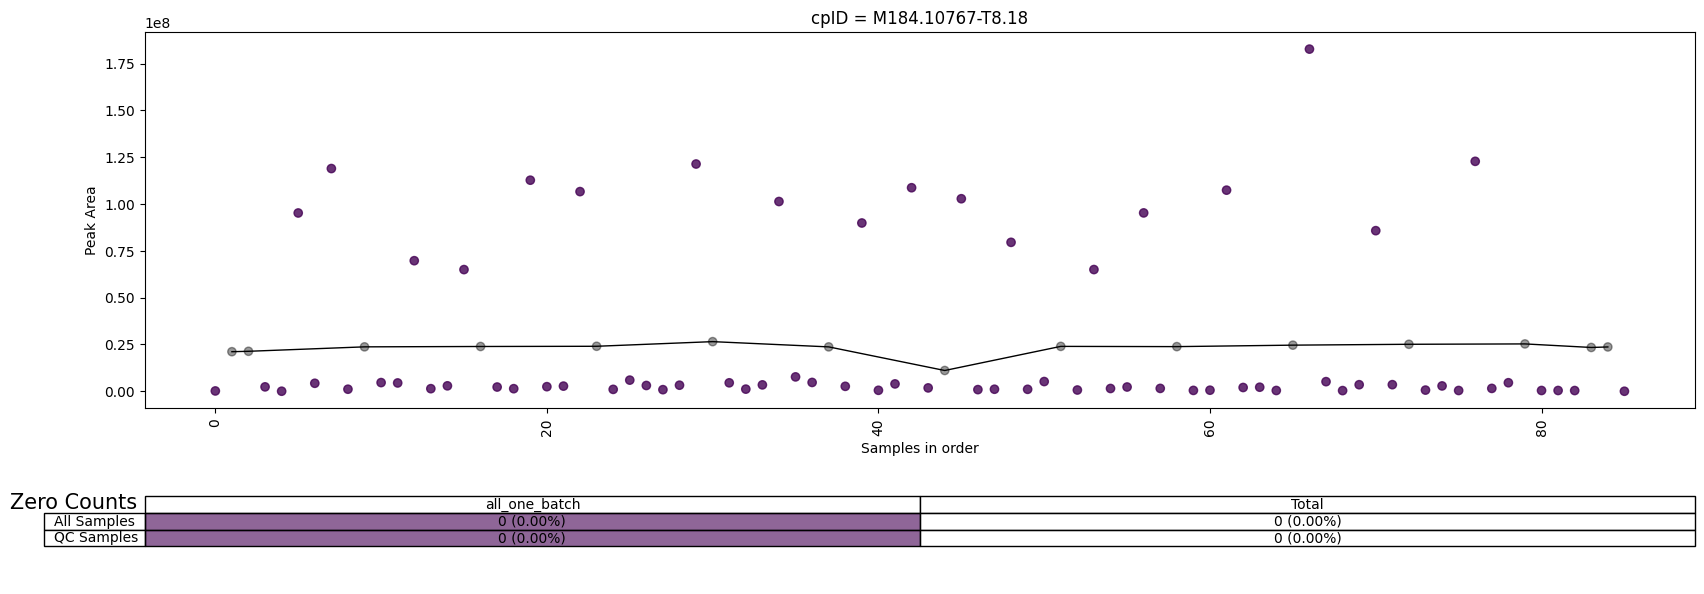

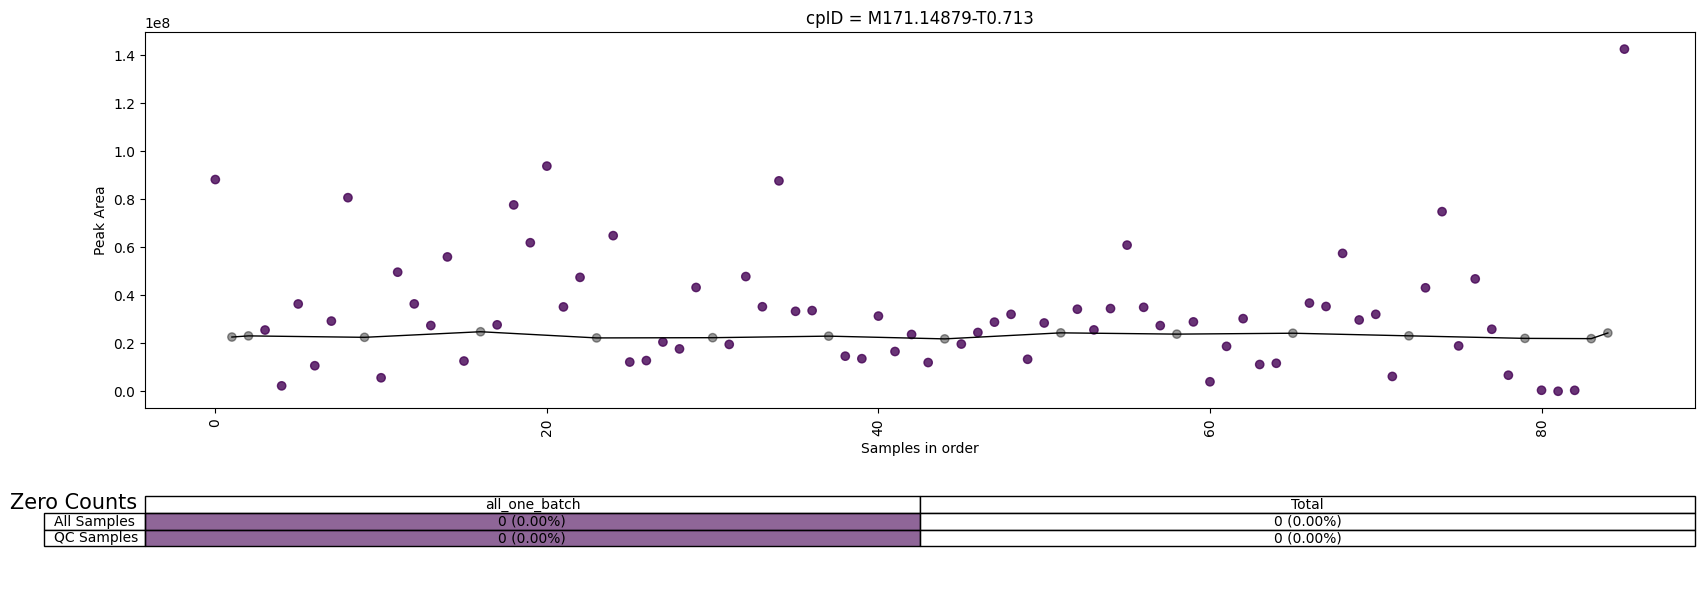

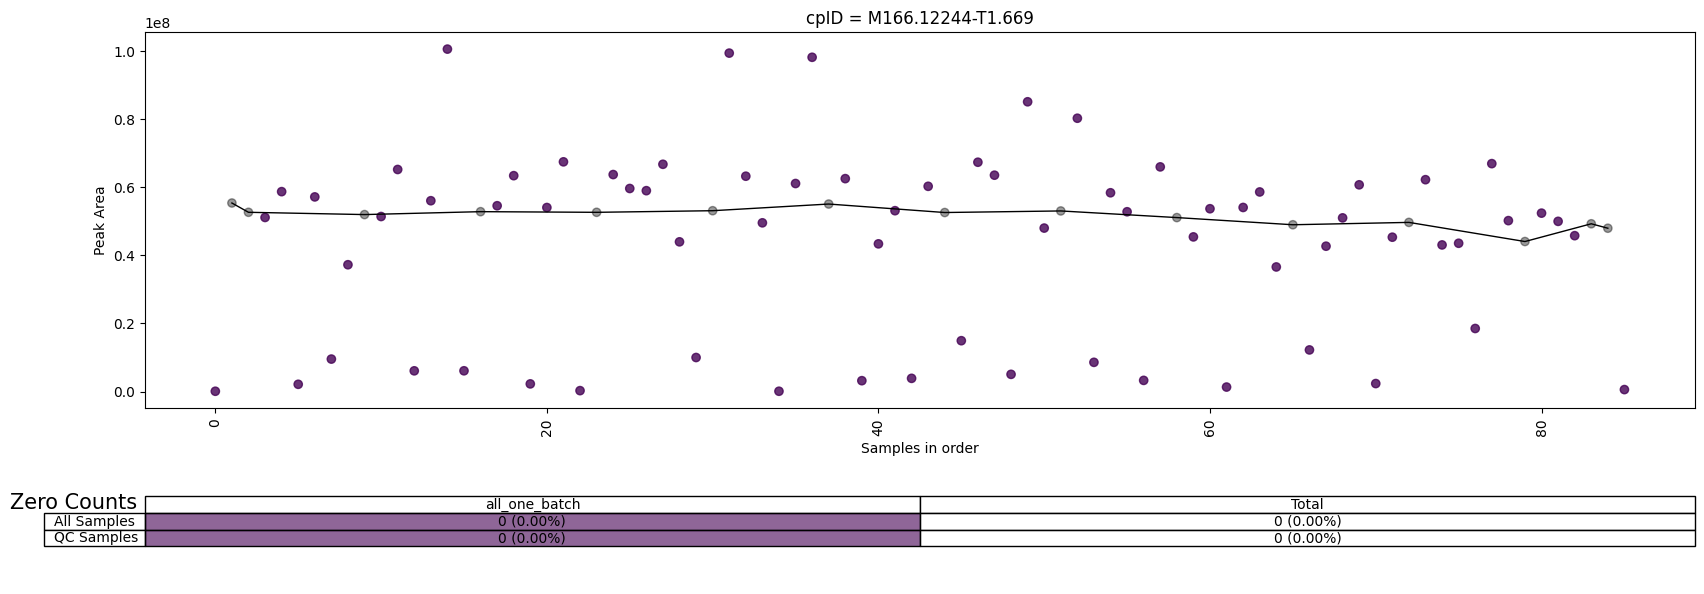

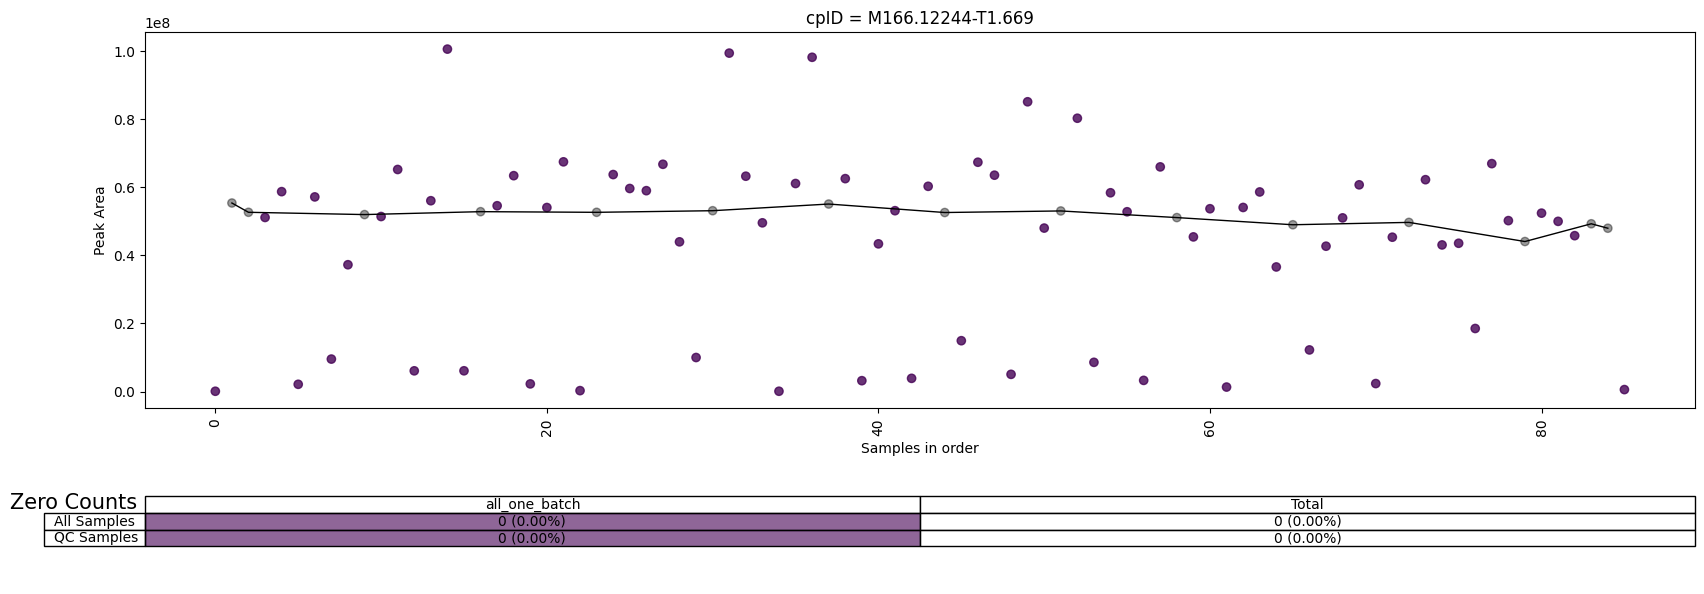

In [13]:
# Visualize samples by batches (if you have batches, else will be all in one color)
wf.visualizer_samples_by_batch(show = 'default', cmap = 'viridis')

### Systematic error and Batch effect correction

In [14]:
# Filter features with low intensity based on the blank samples
wf.filter_blank_intensity_ratio(ratio = 20, setting = 'first')
# Show data
wf.data

Number of features removed: 3400 ;being: [10, 15, 16, 20, 21, 26, 27, 28, 29, 35, 36, 39, 42, 45, 46, 48, 49, 54, 55, 57, 58, 59, 60, 62, 63, 64, 65, 69, 70, 77, 87, 88, 92, 94, 100, 105, 106, 107, 109, 110, 113, 122, 123, 124, 125, 126, 131, 133, 137, 138, 146, 153, 154, 156, 168, 173, 185, 193, 195, 197, 198, 203, 215, 217, 224, 231, 235, 236, 250, 251, 254, 255, 256, 259, 264, 267, 268, 274, 280, 281, 282, 291, 295, 299, 310, 312, 316, 318, 322, 324, 330, 332, 337, 340, 346, 347, 349, 350, 352, 357, 362, 364, 367, 384, 386, 387, 392, 395, 397, 398, 402, 403, 404, 405, 407, 409, 419, 420, 423, 427, 432, 444, 448, 449, 450, 451, 457, 463, 466, 468, 469, 473, 475, 479, 480, 489, 490, 492, 494, 495, 496, 503, 506, 509, 511, 513, 514, 517, 521, 523, 530, 531, 532, 535, 537, 539, 544, 545, 548, 550, 557, 558, 559, 561, 567, 568, 571, 572, 573, 575, 581, 583, 584, 585, 586, 588, 590, 593, 599, 605, 608, 614, 615, 624, 630, 631, 636, 638, 642, 645, 646, 647, 649, 651, 653, 654, 667, 680, 68

,cpdID,Area:(F7),Area:(F97),Area:(F98),Area:(F48),Area:(F2),Area:(F11),Area:(F72),Area:(F66),Area:(F53),...,Area:(F61),Area:(F5),Area:(F81),Area:(F109),Area:(F42),Area:(F43),Area:(F44),Area:(F110),Area:(F111),Area:(F8)
0,M138.05472-T5.829,1.487941e+07,2.135956e+09,2.014839e+09,2.138310e+09,1.134139e+09,2.172048e+09,1.957423e+09,2.446298e+09,2.236703e+09,...,2.381401e+09,2.005137e+09,1.950669e+09,2.012068e+09,3.681834e+09,3.850500e+09,3.520632e+09,2.126048e+09,2.154301e+09,2.313382e+06
1,M195.08733-T0.759,2.836050e+06,6.730272e+08,7.150877e+08,6.083020e+08,6.707446e+08,8.147524e+08,7.290234e+08,9.732532e+08,5.258038e+08,...,1.010843e+09,4.795502e+07,7.321129e+08,6.660449e+08,1.661893e+09,1.602658e+09,1.545228e+09,7.065315e+08,6.997258e+08,4.962972e+05
2,M195.08728-T0.765,2.832966e+06,7.224195e+08,6.663171e+08,6.296461e+08,7.592160e+08,7.664590e+08,7.491594e+08,9.909759e+08,5.083185e+08,...,1.033011e+09,4.848064e+07,7.630803e+08,6.492501e+08,1.466821e+09,1.489799e+09,1.534312e+09,6.534750e+08,6.337872e+08,5.239204e+05
3,M195.08735-T0.756,2.796890e+06,6.794977e+08,6.521187e+08,6.124841e+08,7.170563e+08,7.511934e+08,8.032227e+08,1.016119e+09,5.054313e+08,...,1.015388e+09,4.811784e+07,6.829622e+08,6.844992e+08,1.490335e+09,1.642771e+09,1.559223e+09,6.712125e+08,6.510647e+08,4.739487e+05
4,M94.065-T3.744,3.316189e+06,9.027335e+08,7.904249e+08,6.849016e+08,9.512551e+08,1.723776e+08,7.198670e+08,3.568669e+08,8.750725e+08,...,3.172212e+08,8.945106e+08,1.019567e+09,7.886862e+08,1.193924e+09,1.449528e+09,8.554574e+08,7.746920e+08,7.561196e+08,4.326626e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2726,M363.06812-T5.207,1.932510e+03,1.002320e+05,7.557566e+04,1.306662e+05,8.204776e+04,3.707044e+03,1.095982e+05,2.014291e+04,1.933659e+05,...,5.223480e+03,6.670890e+04,6.209900e+04,7.239104e+04,1.121910e+05,1.671643e+05,9.647979e+04,5.246135e+04,6.277189e+04,1.618418e+03
2727,M303.10476-T5.671,2.756685e+03,8.213471e+04,1.341624e+05,1.468526e+05,1.224588e+05,9.553925e+04,1.009155e+05,1.642376e+05,9.712129e+04,...,2.335774e+04,9.133784e+03,3.380440e+04,1.692215e+04,2.082357e+04,2.090532e+04,1.759583e+04,7.226610e+04,6.092293e+04,2.148177e+03
2728,M264.08633-T5.185,2.863085e+03,1.717578e+05,1.017846e+05,1.147378e+05,9.065571e+04,7.188714e+03,7.743363e+04,1.496830e+04,1.539820e+05,...,5.743154e+03,3.552738e+04,5.511144e+04,6.523591e+04,1.683742e+04,4.820133e+04,6.854535e+04,6.648762e+04,6.412752e+04,2.265884e+03
2729,M186.05225-T5.661,3.011175e+03,8.208229e+04,6.181026e+04,1.867146e+04,3.193149e+04,1.662148e+04,4.150550e+04,6.668401e+03,4.373706e+04,...,8.951650e+03,1.609853e+04,2.226686e+04,1.493496e+04,1.672258e+04,1.823750e+04,1.816078e+04,3.726345e+04,3.445120e+04,2.510460e+03


In [15]:
# Filter out (delete) blank samples (we don't need them anymore)
wf.filter_out_blanks()
# Show data
wf.data

Blank samples were removed from the data.


,cpdID,Area:(F97),Area:(F98),Area:(F48),Area:(F2),Area:(F11),Area:(F72),Area:(F66),Area:(F53),Area:(F99),...,Area:(F58),Area:(F61),Area:(F5),Area:(F81),Area:(F109),Area:(F42),Area:(F43),Area:(F44),Area:(F110),Area:(F111)
0,M138.05472-T5.829,2.135956e+09,2.014839e+09,2.138310e+09,1.134139e+09,2.172048e+09,1.957423e+09,2.446298e+09,2.236703e+09,2.135822e+09,...,2.101731e+09,2.381401e+09,2.005137e+09,1.950669e+09,2.012068e+09,3.681834e+09,3.850500e+09,3.520632e+09,2.126048e+09,2.154301e+09
1,M195.08733-T0.759,6.730272e+08,7.150877e+08,6.083020e+08,6.707446e+08,8.147524e+08,7.290234e+08,9.732532e+08,5.258038e+08,6.469672e+08,...,6.581324e+08,1.010843e+09,4.795502e+07,7.321129e+08,6.660449e+08,1.661893e+09,1.602658e+09,1.545228e+09,7.065315e+08,6.997258e+08
2,M195.08728-T0.765,7.224195e+08,6.663171e+08,6.296461e+08,7.592160e+08,7.664590e+08,7.491594e+08,9.909759e+08,5.083185e+08,6.172370e+08,...,6.928712e+08,1.033011e+09,4.848064e+07,7.630803e+08,6.492501e+08,1.466821e+09,1.489799e+09,1.534312e+09,6.534750e+08,6.337872e+08
3,M195.08735-T0.756,6.794977e+08,6.521187e+08,6.124841e+08,7.170563e+08,7.511934e+08,8.032227e+08,1.016119e+09,5.054313e+08,6.592058e+08,...,7.179431e+08,1.015388e+09,4.811784e+07,6.829622e+08,6.844992e+08,1.490335e+09,1.642771e+09,1.559223e+09,6.712125e+08,6.510647e+08
4,M94.065-T3.744,9.027335e+08,7.904249e+08,6.849016e+08,9.512551e+08,1.723776e+08,7.198670e+08,3.568669e+08,8.750725e+08,8.808872e+08,...,6.371902e+08,3.172212e+08,8.945106e+08,1.019567e+09,7.886862e+08,1.193924e+09,1.449528e+09,8.554574e+08,7.746920e+08,7.561196e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2726,M363.06812-T5.207,1.002320e+05,7.557566e+04,1.306662e+05,8.204776e+04,3.707044e+03,1.095982e+05,2.014291e+04,1.933659e+05,8.354434e+04,...,7.001886e+04,5.223480e+03,6.670890e+04,6.209900e+04,7.239104e+04,1.121910e+05,1.671643e+05,9.647979e+04,5.246135e+04,6.277189e+04
2727,M303.10476-T5.671,8.213471e+04,1.341624e+05,1.468526e+05,1.224588e+05,9.553925e+04,1.009155e+05,1.642376e+05,9.712129e+04,1.321654e+05,...,6.908394e+04,2.335774e+04,9.133784e+03,3.380440e+04,1.692215e+04,2.082357e+04,2.090532e+04,1.759583e+04,7.226610e+04,6.092293e+04
2728,M264.08633-T5.185,1.717578e+05,1.017846e+05,1.147378e+05,9.065571e+04,7.188714e+03,7.743363e+04,1.496830e+04,1.539820e+05,9.076250e+04,...,6.385834e+04,5.743154e+03,3.552738e+04,5.511144e+04,6.523591e+04,1.683742e+04,4.820133e+04,6.854535e+04,6.648762e+04,6.412752e+04
2729,M186.05225-T5.661,8.208229e+04,6.181026e+04,1.867146e+04,3.193149e+04,1.662148e+04,4.150550e+04,6.668401e+03,4.373706e+04,6.099157e+04,...,1.495527e+04,8.951650e+03,1.609853e+04,2.226686e+04,1.493496e+04,1.672258e+04,1.823750e+04,1.816078e+04,3.726345e+04,3.445120e+04


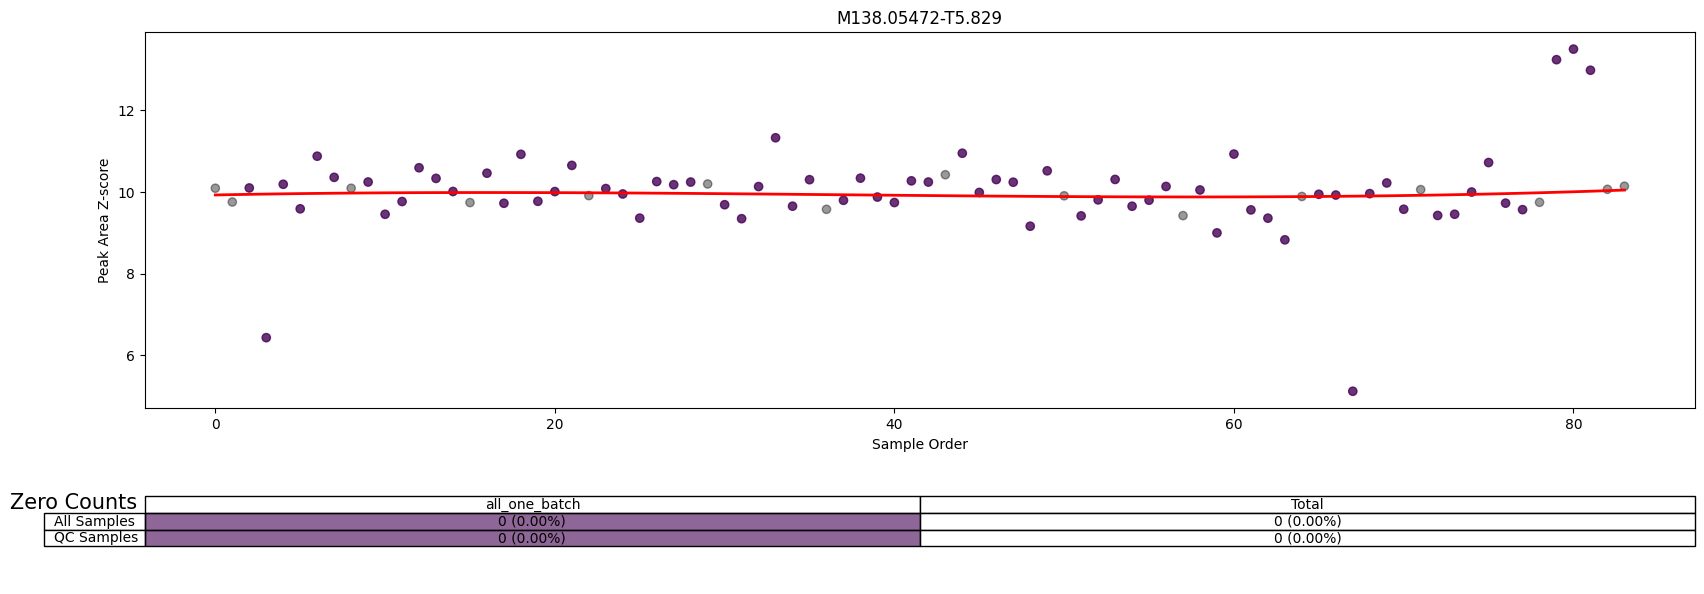

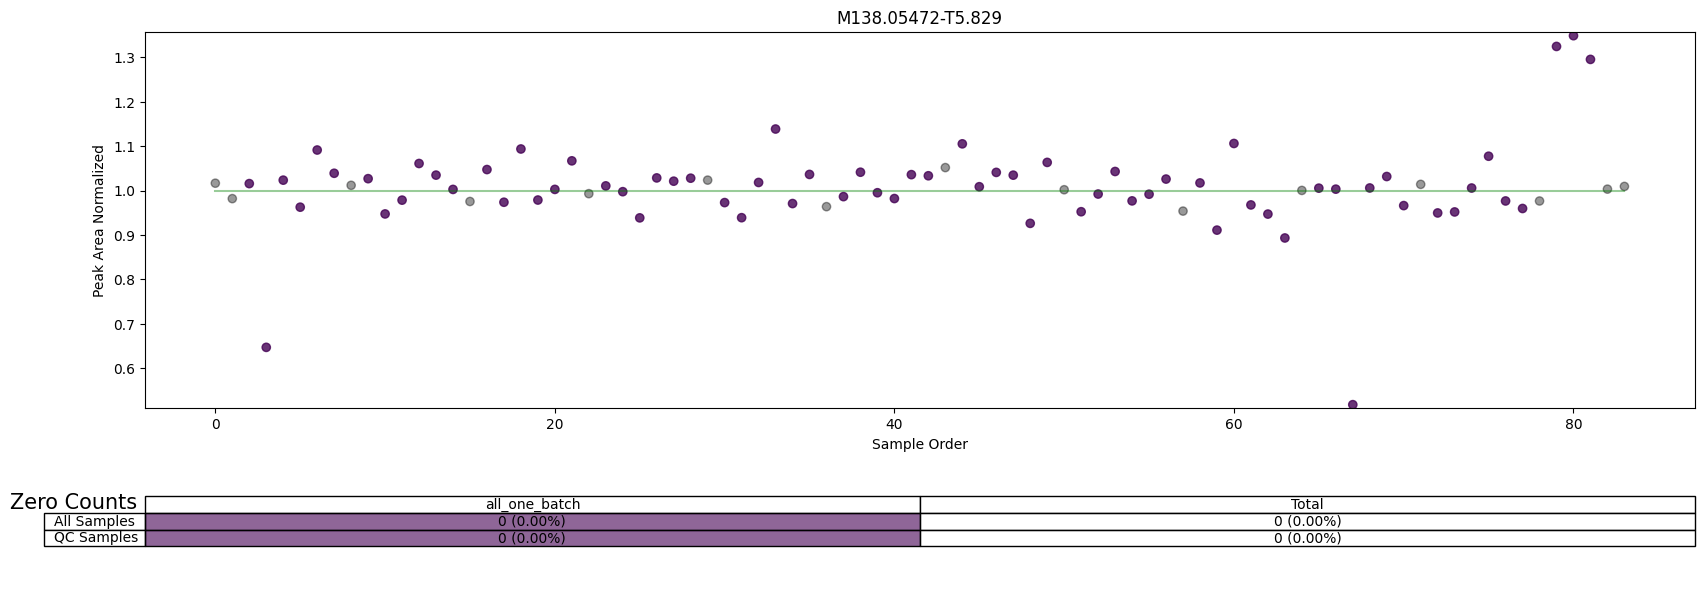

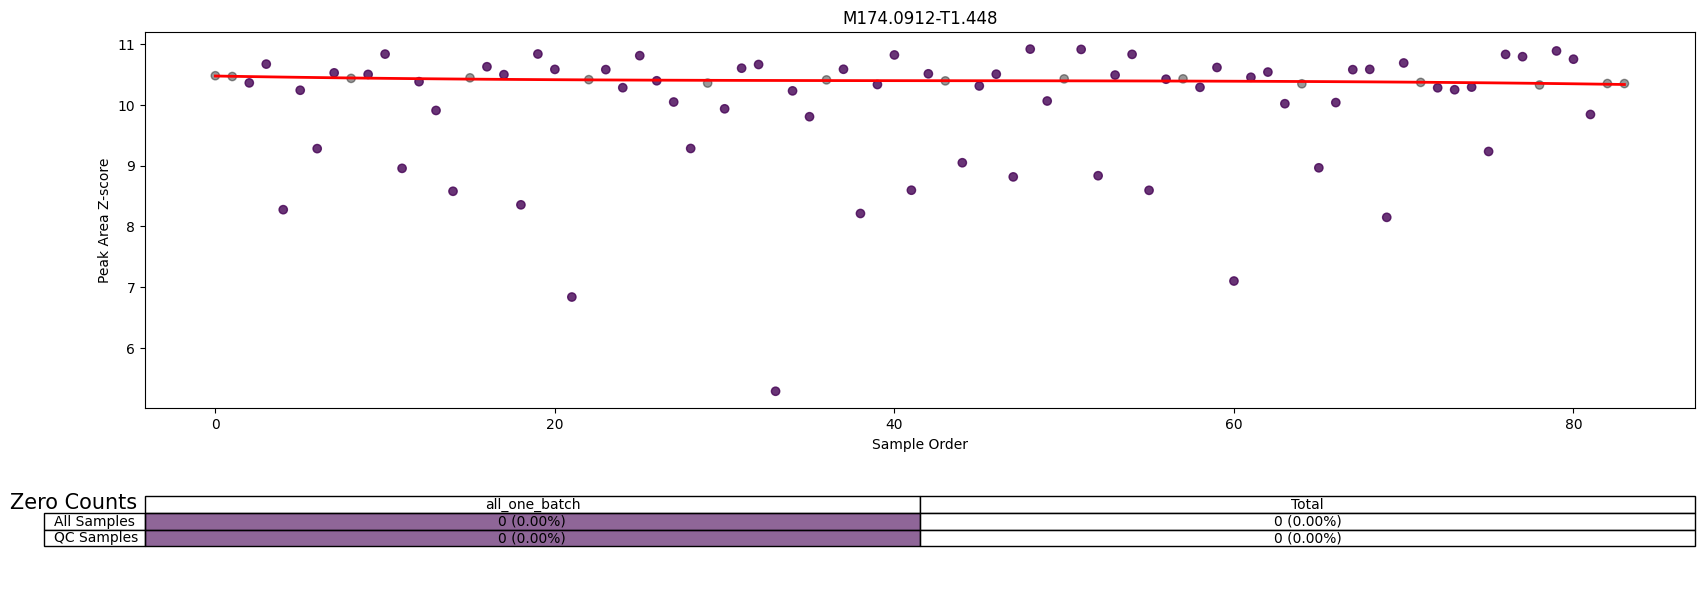

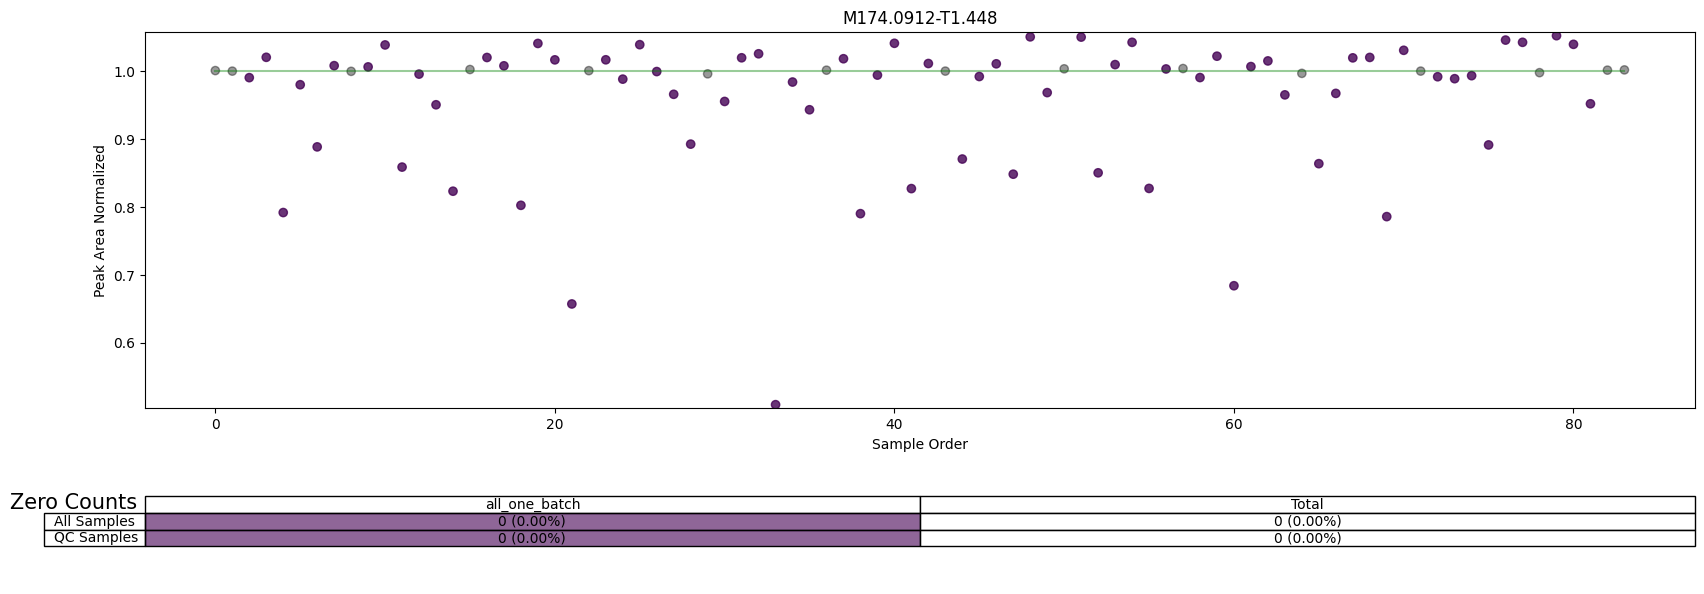

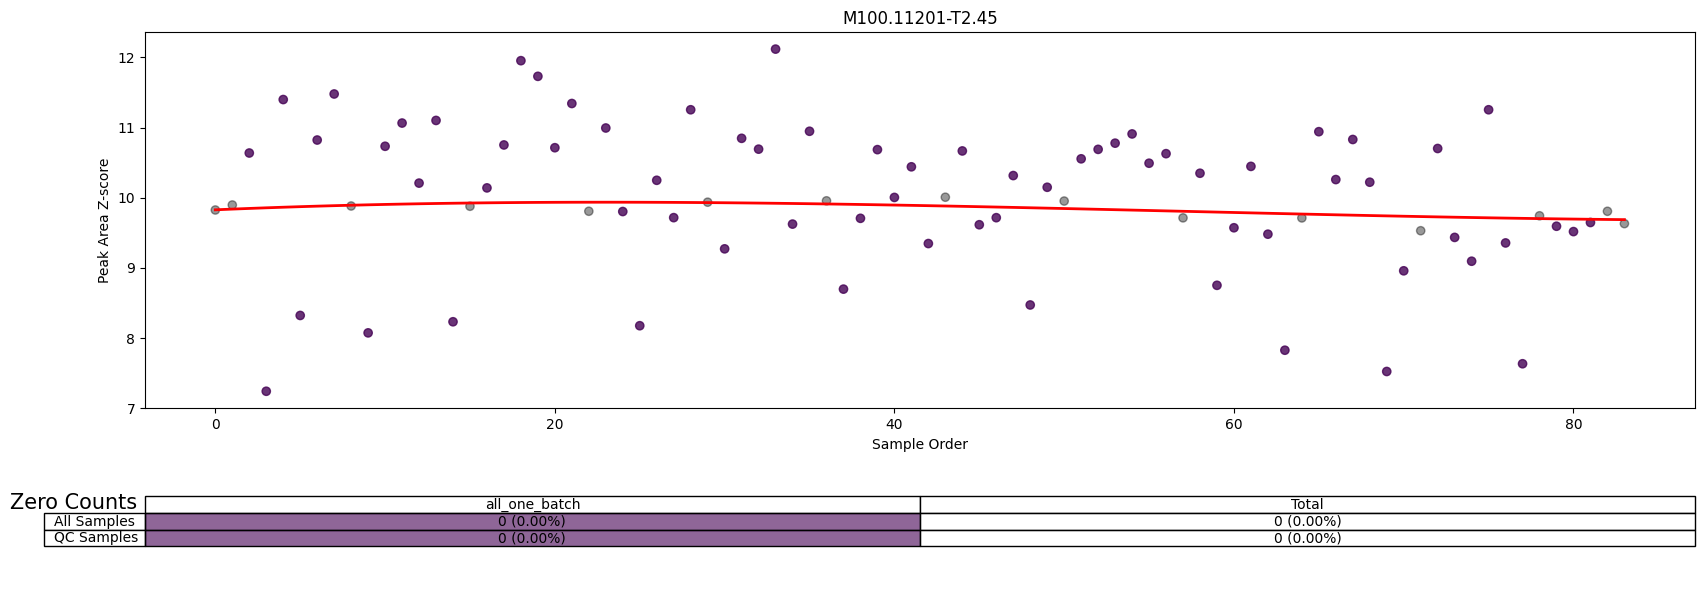

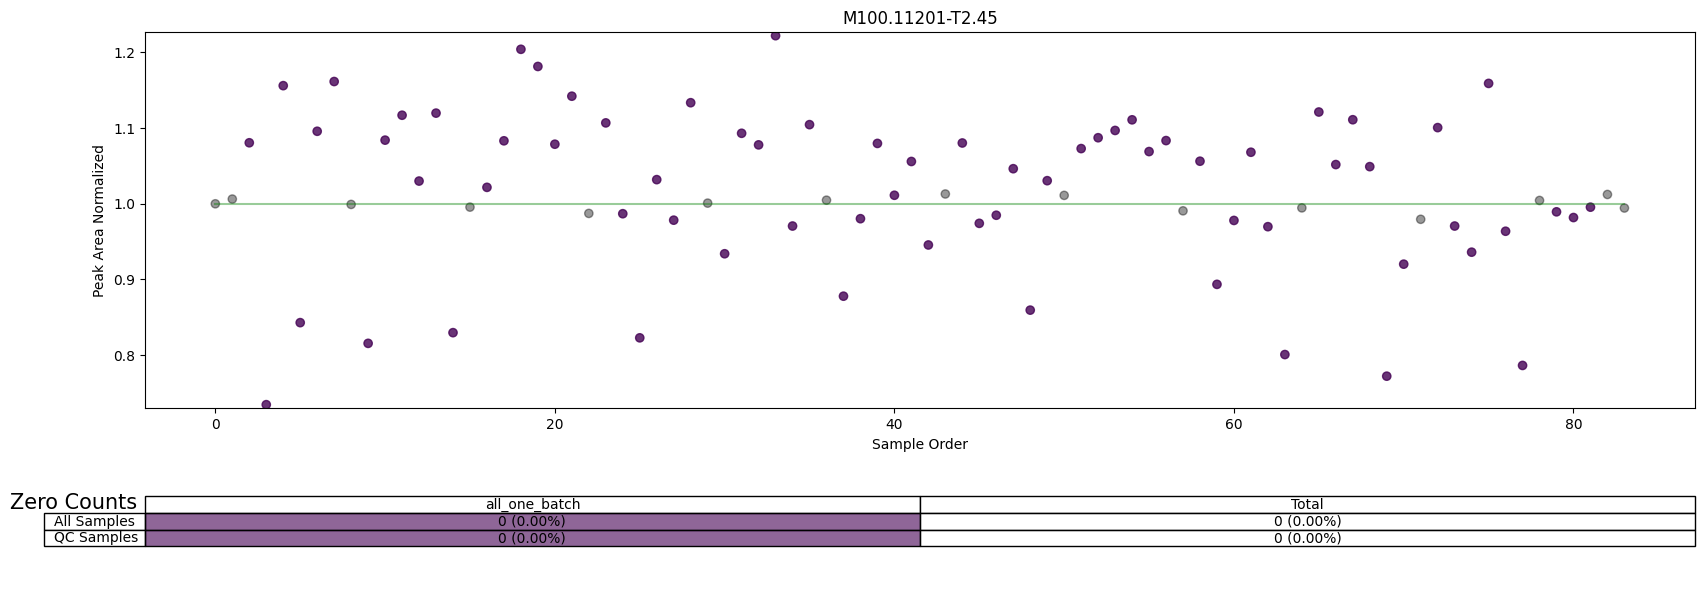

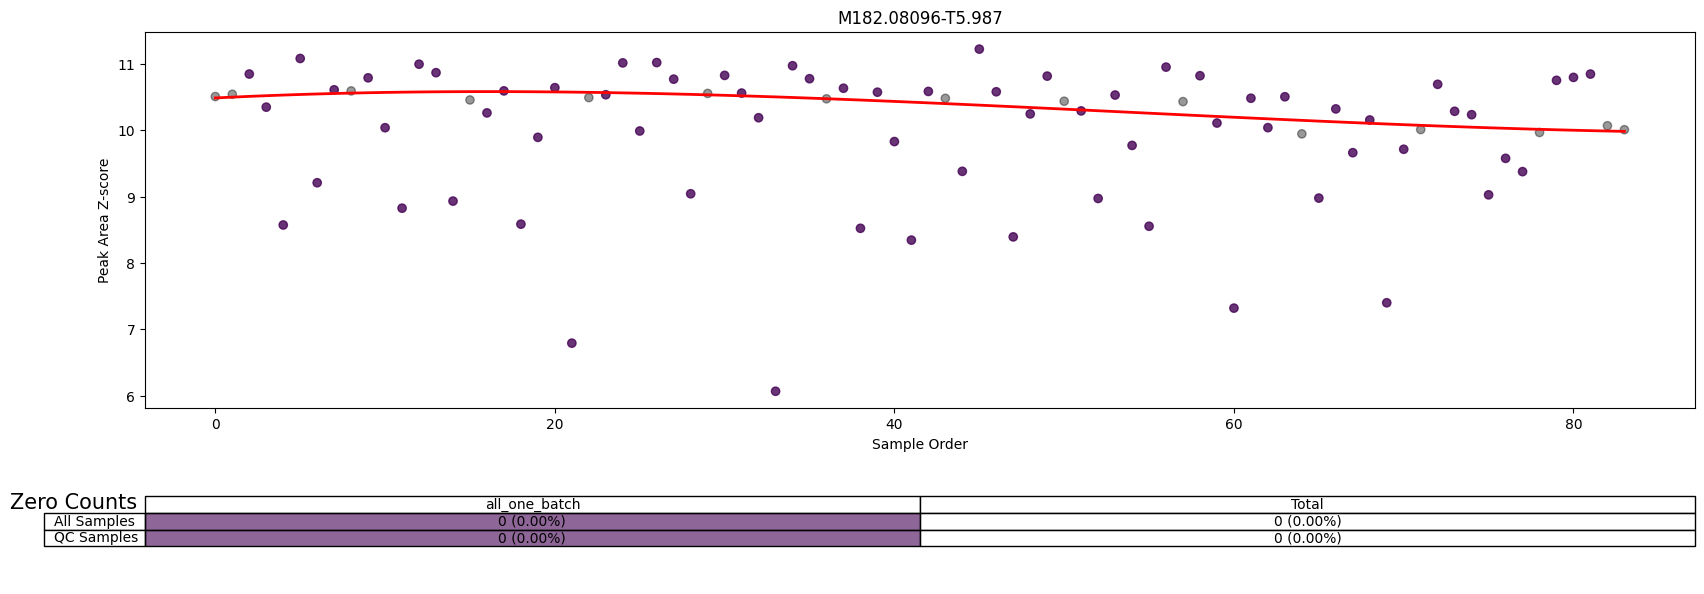

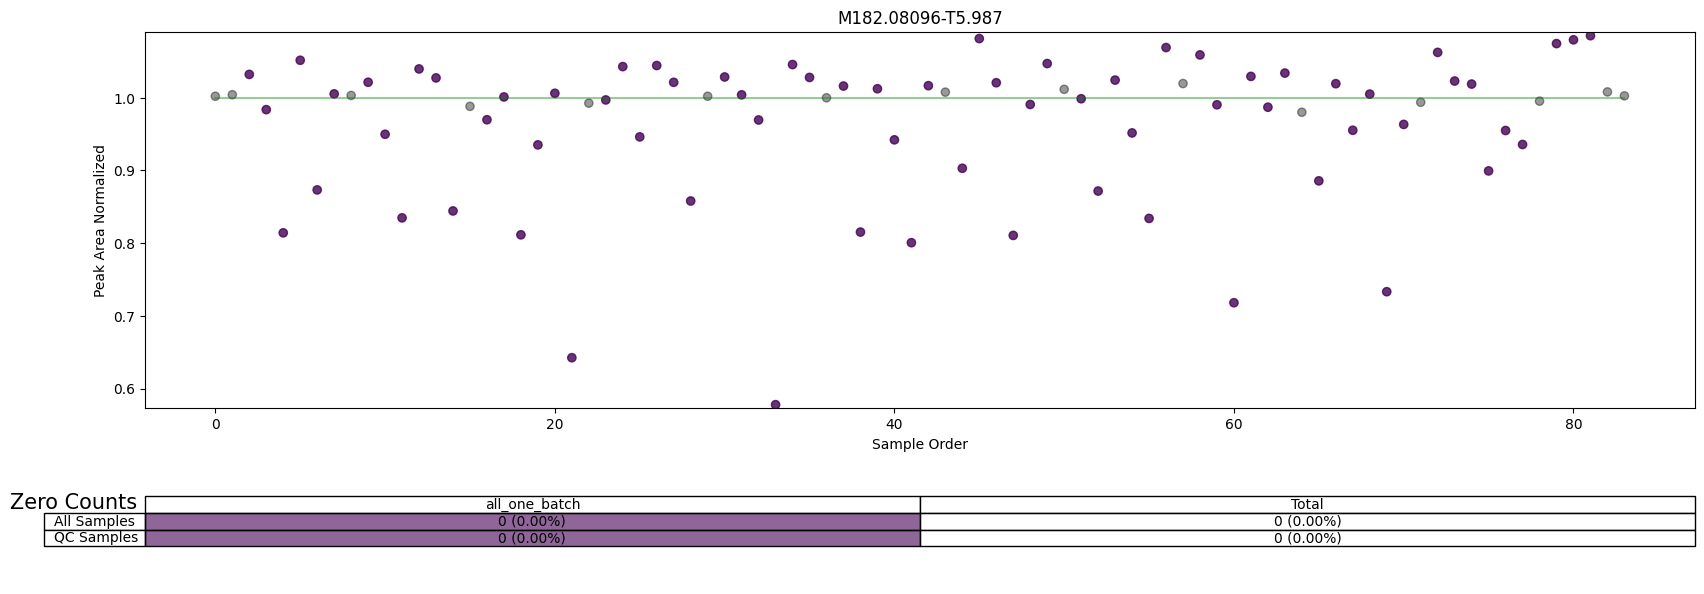

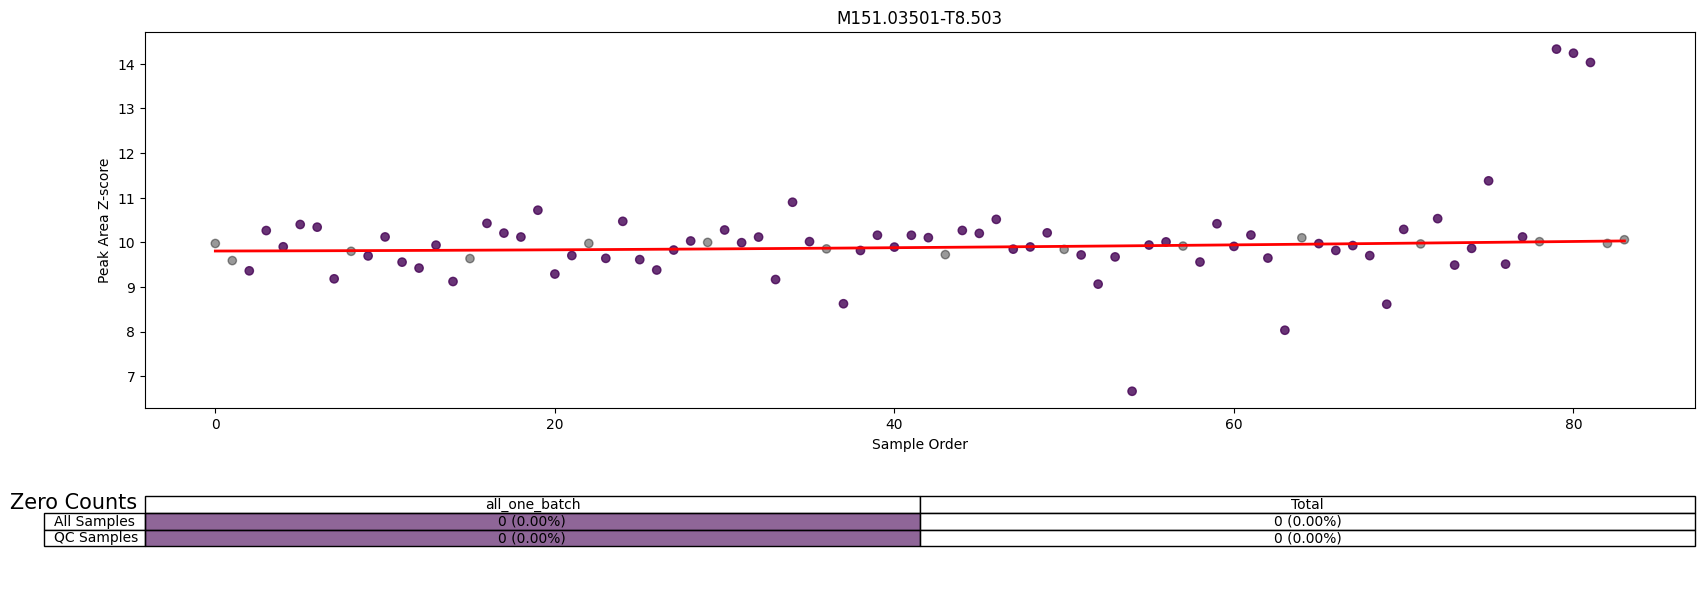

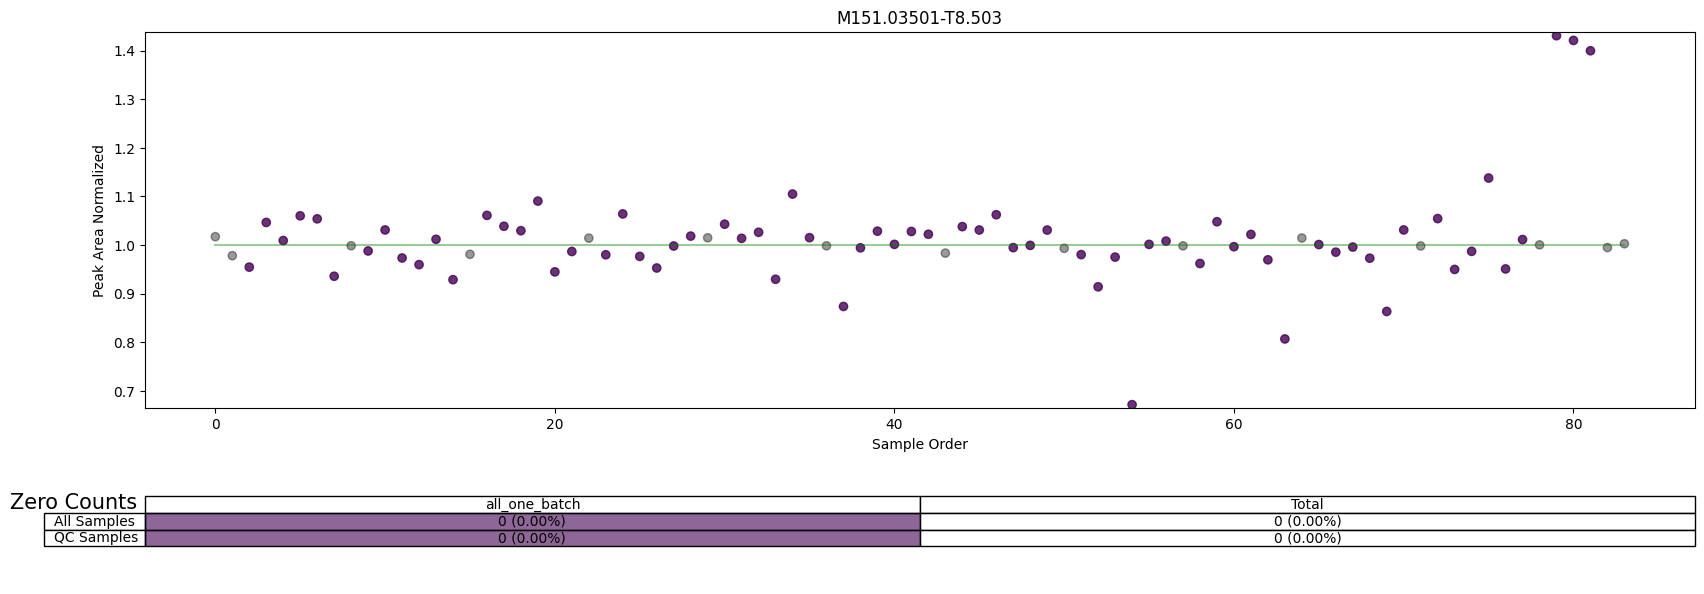

,cpdID,Area:(F97),Area:(F98),Area:(F48),Area:(F2),Area:(F11),Area:(F72),Area:(F66),Area:(F53),Area:(F99),...,Area:(F58),Area:(F61),Area:(F5),Area:(F81),Area:(F109),Area:(F42),Area:(F43),Area:(F44),Area:(F110),Area:(F111)
0,M138.05472-T5.829,22397.453751,21628.621303,22377.017155,15444.265971,22553.000692,21213.807547,24145.291804,22907.018518,22290.862297,...,22154.185790,23808.225955,21514.630629,21150.994262,21513.025128,30527.618203,31279.804575,29644.443654,22098.922901,22235.098612
1,M195.08733-T0.759,21936.050256,22169.168935,21579.289533,21944.739382,22683.837765,22267.873024,23387.625951,21081.553785,21837.861561,...,21810.402172,23444.526401,14035.114609,22207.066196,21857.564379,25496.867763,25344.049871,25191.711628,22084.138395,22051.115933
2,M195.08728-T0.765,22277.153346,21976.372548,21768.357671,22469.660654,22506.683121,22420.534931,23507.521708,20996.970542,21697.954657,...,22216.039835,23789.767164,14149.441866,22624.004760,22024.730998,25322.826715,25410.374262,25559.777559,22112.746871,22015.094082
3,M195.08735-T0.756,22108.186230,21946.613166,21707.589069,22285.105945,22453.195837,22701.087290,23611.945096,20984.131204,21939.412225,...,22297.078023,23639.920817,14128.695990,22107.258745,22114.237244,25215.173679,25630.331903,25402.582674,22032.666667,21916.793910
4,M94.065-T3.744,22192.793952,21857.092383,21501.838162,22308.690598,18398.089480,21611.383104,19965.602560,22086.741364,22101.215322,...,21564.618727,19915.892067,22415.314482,22751.723008,22094.099758,23162.281397,23678.131852,22293.806277,22040.231315,21975.934154
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2726,M363.06812-T5.207,22339.448878,21839.959443,22804.910345,21975.057409,17188.252307,22479.533335,19653.138786,23510.382617,21996.415231,...,22245.991723,18021.850103,22180.324488,22061.996169,22349.726389,23172.719958,23949.654919,22910.910017,21809.826472,22140.839844
2727,M303.10476-T5.671,21791.810935,23242.257066,23477.866985,22861.683898,22067.392651,22193.137409,23657.727156,22011.770640,22909.171900,...,22094.200886,18982.001875,16639.661118,20054.678699,18201.257382,18768.000013,18800.472234,18364.992240,22494.939384,21981.215059
2728,M264.08633-T5.185,22737.556790,21888.377899,22191.248131,21852.809651,17818.238696,21725.219763,19032.065049,23144.592050,22220.191141,...,21927.926664,17905.683131,20900.010533,21710.050895,22045.350581,19677.704592,21540.337170,22226.325219,22204.407921,22174.912135
2729,M186.05225-T5.661,23171.358108,22280.079399,19353.412822,20444.392019,18920.412000,20847.324017,16976.383082,20799.925316,21495.362321,...,20524.320683,19253.290770,20676.881677,21489.582868,20426.160548,20669.803646,20840.506374,20772.475068,22595.881126,22297.324351


In [16]:
# Perform correction using QC samples for an interpolation
wf.correcter_qc_interpolation(show = 'default', p_values = 'default', use_log = True, use_norm = True, use_zeros = False, cmap  = 'viridis')

### Filter by number of corrected batches

In [17]:
# Filter features with less then 80% correctable batches (batch is not correctable if if has too many QC samples being zeros)
wf.filter_number_of_corrected_batches(0.8)

Number of features removed: 0 ;being: [, ...


,cpdID,Area:(F97),Area:(F98),Area:(F48),Area:(F2),Area:(F11),Area:(F72),Area:(F66),Area:(F53),Area:(F99),...,Area:(F58),Area:(F61),Area:(F5),Area:(F81),Area:(F109),Area:(F42),Area:(F43),Area:(F44),Area:(F110),Area:(F111)
0,M138.05472-T5.829,22397.453751,21628.621303,22377.017155,15444.265971,22553.000692,21213.807547,24145.291804,22907.018518,22290.862297,...,22154.185790,23808.225955,21514.630629,21150.994262,21513.025128,30527.618203,31279.804575,29644.443654,22098.922901,22235.098612
1,M195.08733-T0.759,21936.050256,22169.168935,21579.289533,21944.739382,22683.837765,22267.873024,23387.625951,21081.553785,21837.861561,...,21810.402172,23444.526401,14035.114609,22207.066196,21857.564379,25496.867763,25344.049871,25191.711628,22084.138395,22051.115933
2,M195.08728-T0.765,22277.153346,21976.372548,21768.357671,22469.660654,22506.683121,22420.534931,23507.521708,20996.970542,21697.954657,...,22216.039835,23789.767164,14149.441866,22624.004760,22024.730998,25322.826715,25410.374262,25559.777559,22112.746871,22015.094082
3,M195.08735-T0.756,22108.186230,21946.613166,21707.589069,22285.105945,22453.195837,22701.087290,23611.945096,20984.131204,21939.412225,...,22297.078023,23639.920817,14128.695990,22107.258745,22114.237244,25215.173679,25630.331903,25402.582674,22032.666667,21916.793910
4,M94.065-T3.744,22192.793952,21857.092383,21501.838162,22308.690598,18398.089480,21611.383104,19965.602560,22086.741364,22101.215322,...,21564.618727,19915.892067,22415.314482,22751.723008,22094.099758,23162.281397,23678.131852,22293.806277,22040.231315,21975.934154
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2726,M363.06812-T5.207,22339.448878,21839.959443,22804.910345,21975.057409,17188.252307,22479.533335,19653.138786,23510.382617,21996.415231,...,22245.991723,18021.850103,22180.324488,22061.996169,22349.726389,23172.719958,23949.654919,22910.910017,21809.826472,22140.839844
2727,M303.10476-T5.671,21791.810935,23242.257066,23477.866985,22861.683898,22067.392651,22193.137409,23657.727156,22011.770640,22909.171900,...,22094.200886,18982.001875,16639.661118,20054.678699,18201.257382,18768.000013,18800.472234,18364.992240,22494.939384,21981.215059
2728,M264.08633-T5.185,22737.556790,21888.377899,22191.248131,21852.809651,17818.238696,21725.219763,19032.065049,23144.592050,22220.191141,...,21927.926664,17905.683131,20900.010533,21710.050895,22045.350581,19677.704592,21540.337170,22226.325219,22204.407921,22174.912135
2729,M186.05225-T5.661,23171.358108,22280.079399,19353.412822,20444.392019,18920.412000,20847.324017,16976.383082,20799.925316,21495.362321,...,20524.320683,19253.290770,20676.881677,21489.582868,20426.160548,20669.803646,20840.506374,20772.475068,22595.881126,22297.324351


### Filter RSD%

In [18]:
# Filter by RSD%
wf.filter_relative_standard_deviation(rsd_threshold = 20, to_plot = False)

84
No compounds with RSD > 20 were found.
Number of features removed: 0 ;being: []


,cpdID,Area:(F97),Area:(F98),Area:(F48),Area:(F2),Area:(F11),Area:(F72),Area:(F66),Area:(F53),Area:(F99),...,Area:(F58),Area:(F61),Area:(F5),Area:(F81),Area:(F109),Area:(F42),Area:(F43),Area:(F44),Area:(F110),Area:(F111)
0,M138.05472-T5.829,22397.453751,21628.621303,22377.017155,15444.265971,22553.000692,21213.807547,24145.291804,22907.018518,22290.862297,...,22154.185790,23808.225955,21514.630629,21150.994262,21513.025128,30527.618203,31279.804575,29644.443654,22098.922901,22235.098612
1,M195.08733-T0.759,21936.050256,22169.168935,21579.289533,21944.739382,22683.837765,22267.873024,23387.625951,21081.553785,21837.861561,...,21810.402172,23444.526401,14035.114609,22207.066196,21857.564379,25496.867763,25344.049871,25191.711628,22084.138395,22051.115933
2,M195.08728-T0.765,22277.153346,21976.372548,21768.357671,22469.660654,22506.683121,22420.534931,23507.521708,20996.970542,21697.954657,...,22216.039835,23789.767164,14149.441866,22624.004760,22024.730998,25322.826715,25410.374262,25559.777559,22112.746871,22015.094082
3,M195.08735-T0.756,22108.186230,21946.613166,21707.589069,22285.105945,22453.195837,22701.087290,23611.945096,20984.131204,21939.412225,...,22297.078023,23639.920817,14128.695990,22107.258745,22114.237244,25215.173679,25630.331903,25402.582674,22032.666667,21916.793910
4,M94.065-T3.744,22192.793952,21857.092383,21501.838162,22308.690598,18398.089480,21611.383104,19965.602560,22086.741364,22101.215322,...,21564.618727,19915.892067,22415.314482,22751.723008,22094.099758,23162.281397,23678.131852,22293.806277,22040.231315,21975.934154
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2726,M363.06812-T5.207,22339.448878,21839.959443,22804.910345,21975.057409,17188.252307,22479.533335,19653.138786,23510.382617,21996.415231,...,22245.991723,18021.850103,22180.324488,22061.996169,22349.726389,23172.719958,23949.654919,22910.910017,21809.826472,22140.839844
2727,M303.10476-T5.671,21791.810935,23242.257066,23477.866985,22861.683898,22067.392651,22193.137409,23657.727156,22011.770640,22909.171900,...,22094.200886,18982.001875,16639.661118,20054.678699,18201.257382,18768.000013,18800.472234,18364.992240,22494.939384,21981.215059
2728,M264.08633-T5.185,22737.556790,21888.377899,22191.248131,21852.809651,17818.238696,21725.219763,19032.065049,23144.592050,22220.191141,...,21927.926664,17905.683131,20900.010533,21710.050895,22045.350581,19677.704592,21540.337170,22226.325219,22204.407921,22174.912135
2729,M186.05225-T5.661,23171.358108,22280.079399,19353.412822,20444.392019,18920.412000,20847.324017,16976.383082,20799.925316,21495.362321,...,20524.320683,19253.290770,20676.881677,21489.582868,20426.160548,20669.803646,20840.506374,20772.475068,22595.881126,22297.324351


### Saving the progress after processing

In [19]:
# Save the datasets
wf.saver_all_datasets()

All datasets were saved.


True

## STATISTICAL ANALYSIS

### Correlations

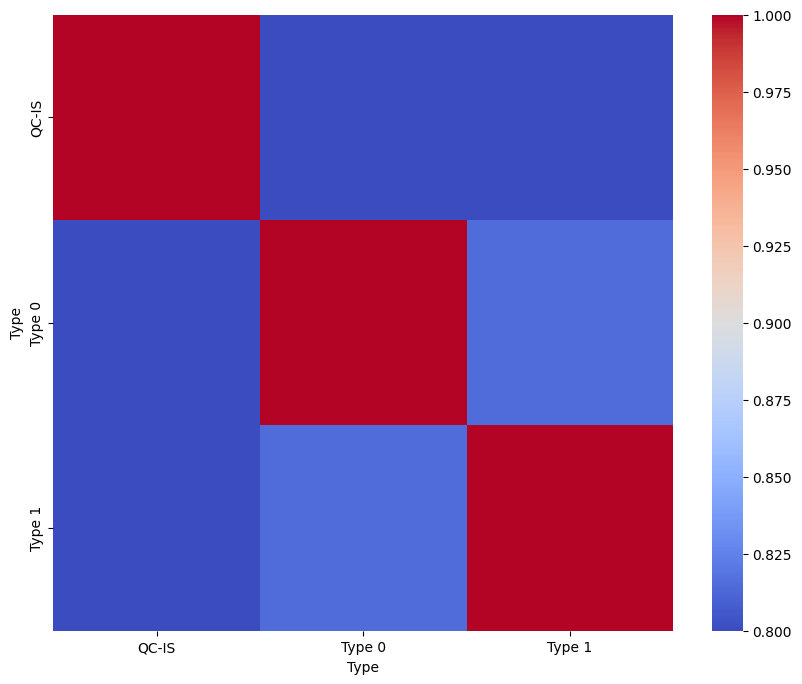

Type,QC-IS,Type 0,Type 1
Type,,,
QC-IS,1.000000,0.530924,0.686897
Type 0,0.530924,1.000000,0.814600
Type 1,0.686897,0.814600,1.000000


In [20]:
wf.statistics_correlation_means(column_name='Type', cmap = 'coolwarm', min_max=[0.8, 1], plt_name_suffix = 'group_correlation_matrix_heatmap-Type')

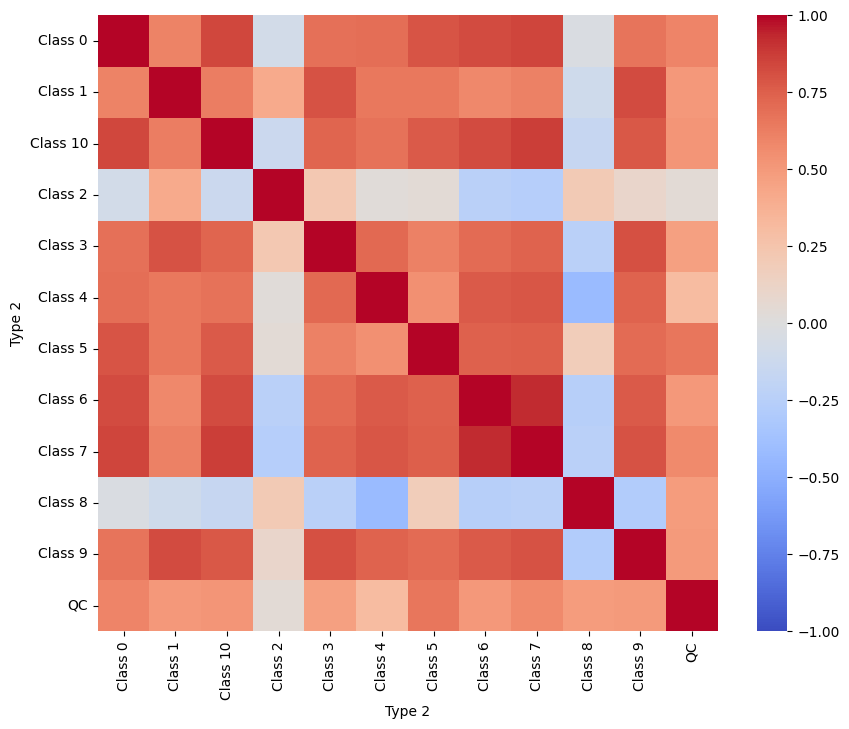

Type 2,Class 0,Class 1,Class 10,Class 2,Class 3,Class 4,Class 5,Class 6,Class 7,Class 8,Class 9,QC
Type 2,,,,,,,,,,,,
Class 0,1.000000,0.603808,0.837440,-0.084736,0.684948,0.690026,0.793934,0.827962,0.851116,-0.027543,0.671294,0.597326
Class 1,0.603808,1.000000,0.631005,0.408782,0.804209,0.648774,0.655811,0.581588,0.615235,-0.103022,0.825526,0.505922
Class 10,0.837440,0.631005,1.000000,-0.127695,0.730766,0.675104,0.771754,0.826123,0.874187,-0.162267,0.774610,0.518197
Class 2,-0.084736,0.408782,-0.127695,1.000000,0.219153,0.025836,0.040447,-0.239708,-0.259101,0.209237,0.095756,0.041046
Class 3,0.684948,0.804209,0.730766,0.219153,1.000000,0.713322,0.612120,0.709831,0.737938,-0.240453,0.811453,0.466597
Class 4,0.690026,0.648774,0.675104,0.025836,0.713322,1.000000,0.544454,0.766928,0.782081,-0.423017,0.736814,0.311020
Class 5,0.793934,0.655811,0.771754,0.040447,0.612120,0.544454,1.000000,0.744515,0.753185,0.182758,0.707148,0.662863
Class 6,0.827962,0.581588,0.826123,-0.239708,0.709831,0.766928,0.744515,1.000000,0.922791,-0.251006,0.773204,0.506530
Class 7,0.851116,0.615235,0.874187,-0.259101,0.737938,0.782081,0.753185,0.922791,1.000000,-0.237582,0.797359,0.574365


In [21]:
wf.statistics_correlation_means(column_name='Type 2', cmap = 'coolwarm', plt_name_suffix = 'group_correlation_matrix_heatmap-Type2')

### PCA

In [22]:
#Perform PCA
wf.statistics_PCA()

array([[-2.29459568e+04,  8.44474549e+03, -1.95762320e+04, ...,
        -2.19732151e+03,  6.82645658e+02, -2.83421286e-10],
       [-2.39779364e+04,  1.20009345e+04, -2.40369765e+04, ...,
        -4.71706361e+03,  2.78407188e+03, -2.70688361e-10],
       [-3.69306370e+04, -1.11867324e+04, -2.87731382e+03, ...,
         7.04126222e+02, -6.79739859e+01, -3.05249159e-10],
       ...,
       [-9.24452878e+04,  9.95649464e+04,  6.87645483e+04, ...,
         1.74155470e+02,  9.25790674e+01, -2.68869371e-10],
       [-2.19854786e+04,  1.12533601e+04, -2.22909749e+04, ...,
        -4.77221621e+03,  5.12440761e+02, -2.77964318e-10],
       [-2.33504955e+04,  1.43172280e+04, -2.23667857e+04, ...,
        -6.46139658e+03,  3.70001628e+02, -2.81602297e-10]])

#### Scree plot

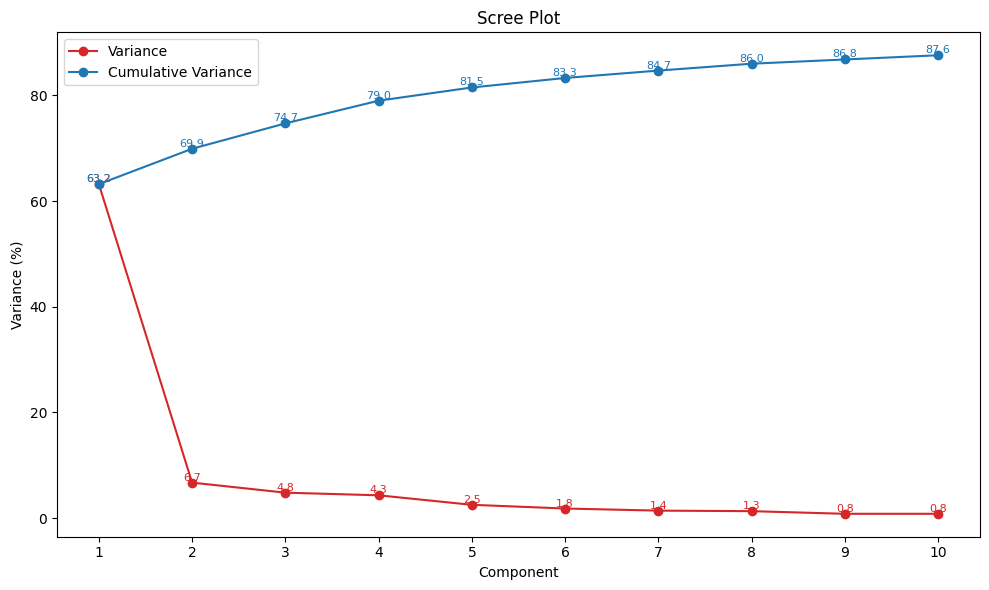

In [23]:
wf.visualizer_PCA_scree_plot(plt_name_suffix = 'scree_plot-percentages')
print()


#### Loadings

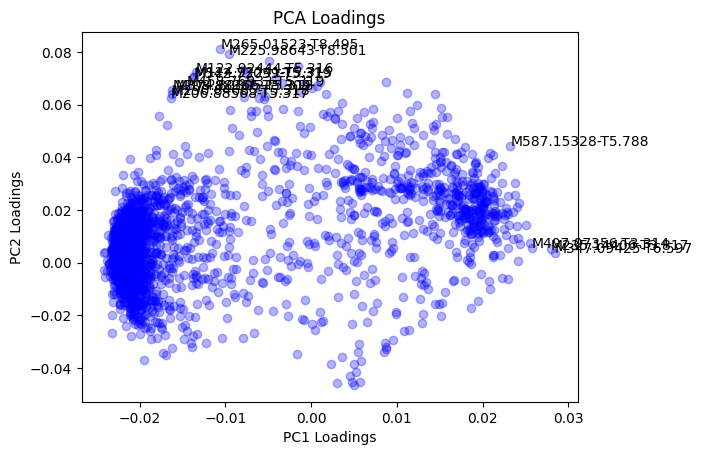

In [24]:
wf.visualizer_PCA_loadings(components=2, plt_name_suffix = 'PCA_loadings_2D')
print()

#### Run order plot

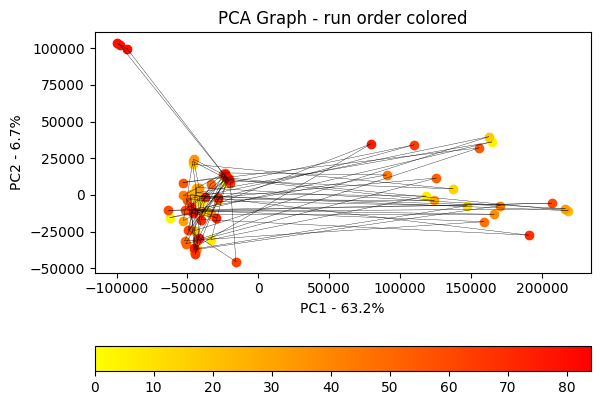

(<Figure size 640x480 with 2 Axes>,
 <Axes: title={'center': 'PCA Graph - run order colored'}, xlabel='PC1 - 63.2%', ylabel='PC2 - 6.7%'>)

In [25]:
wf.visualizer_PCA_run_order(connected = True, plt_name_suffix = 'PCA_run_order')

#### PCA grouped visualized

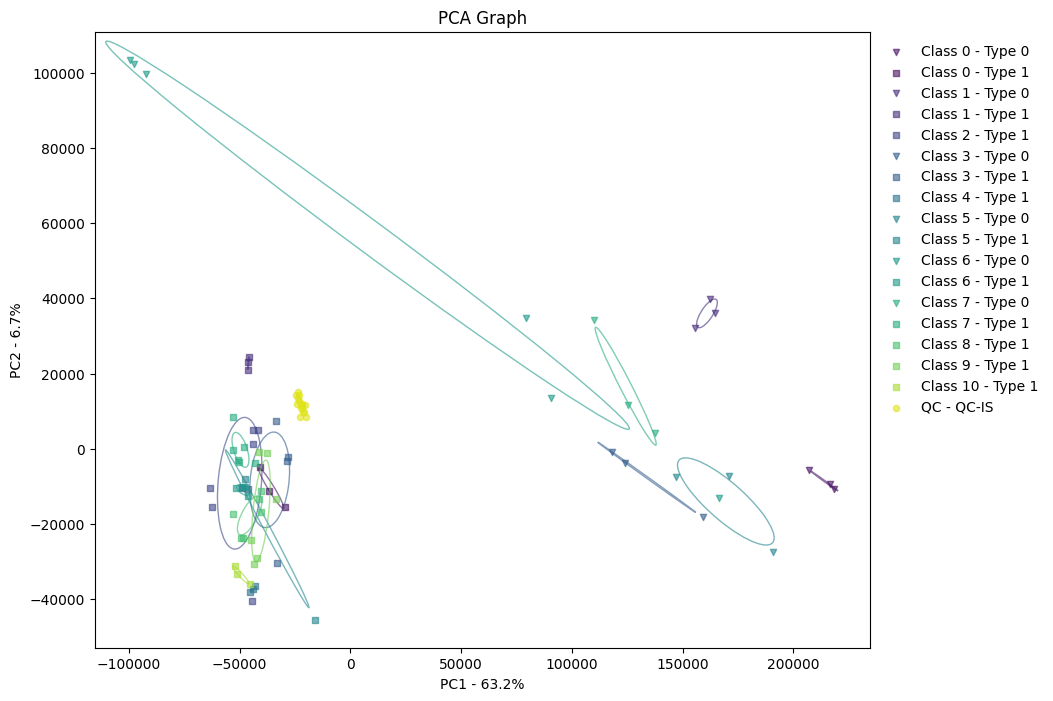

(<Figure size 1000x800 with 1 Axes>,
 <Axes: title={'center': 'PCA Graph'}, xlabel='PC1 - 63.2%', ylabel='PC2 - 6.7%'>)

In [26]:
wf.visualizer_PCA_grouped(color_column = 'Type 2', marker_column='Type', cmap = 'viridis', plt_name_suffix = 'PCA_grouped-combined')

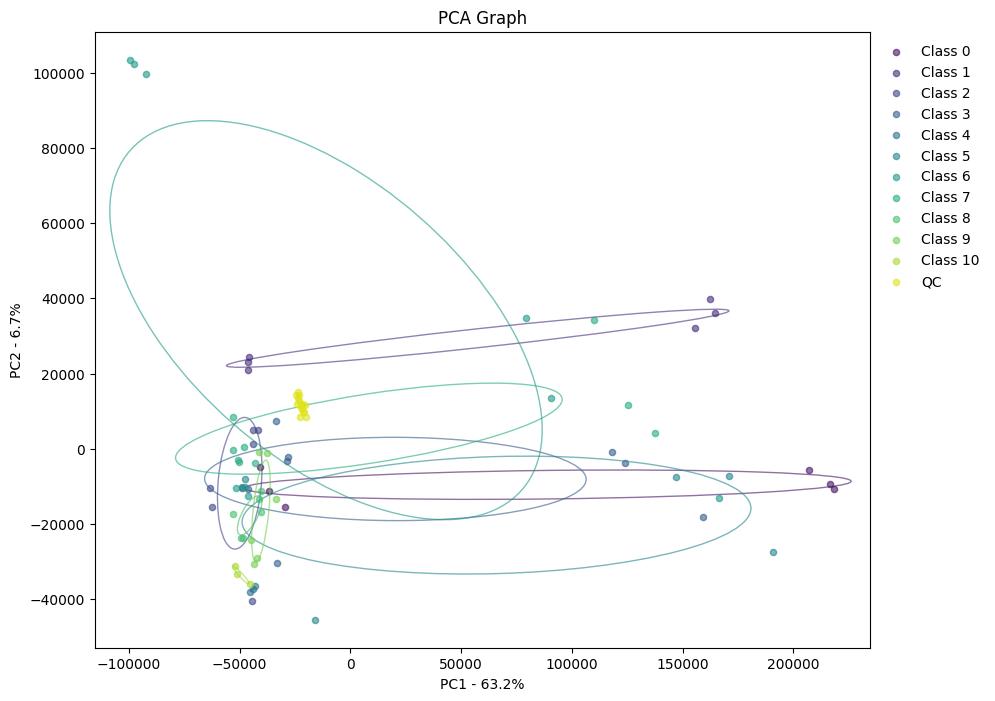

(<Figure size 1000x800 with 1 Axes>,
 <Axes: title={'center': 'PCA Graph'}, xlabel='PC1 - 63.2%', ylabel='PC2 - 6.7%'>)

In [27]:
wf.visualizer_PCA_grouped(color_column='Type 2', marker_column=None, cmap = 'viridis', plt_name_suffix = 'PCA_grouped-Type2')

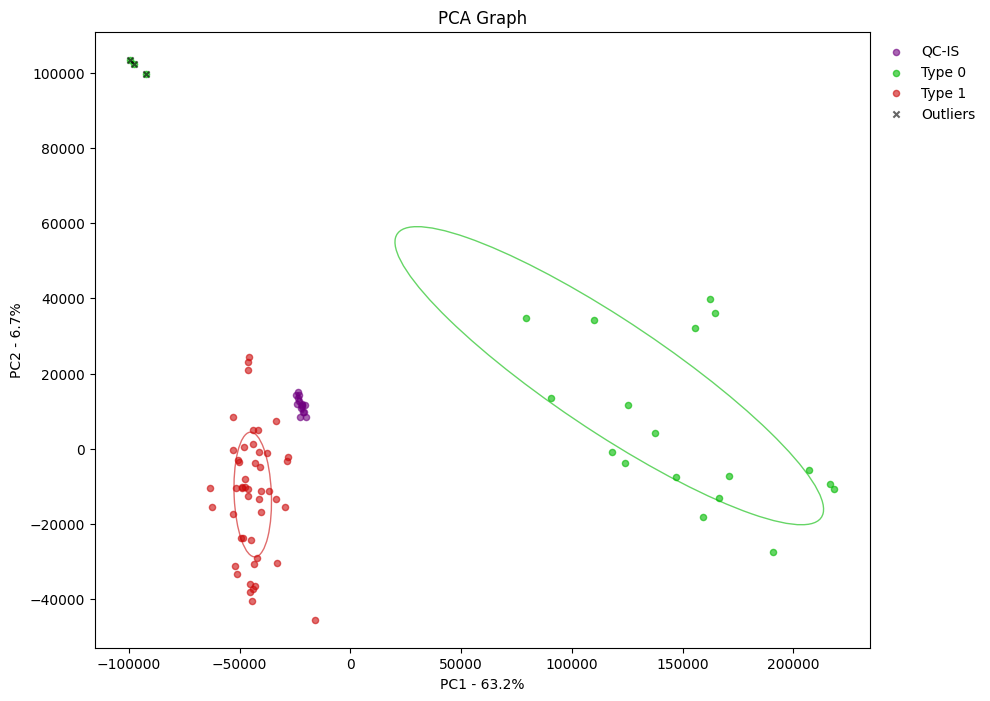

(<Figure size 1000x800 with 1 Axes>,
 <Axes: title={'center': 'PCA Graph'}, xlabel='PC1 - 63.2%', ylabel='PC2 - 6.7%'>)

In [28]:
wf.visualizer_PCA_grouped(color_column='Type', marker_column=None, cmap = 'nipy_spectral', crossout_outliers=True, plt_name_suffix = 'PCA_grouped-Type')

### PLS-DA

#### Perform PLS-DA by grouping by different atributes (response variable)

In [29]:
# Perform PLS-DA
wf.statistics_PLSDA(response_column_names='Type 2')

R2: 0.01925088612799078
Q2:
Class 0    -0.097465
Class 1    -0.097465
Class 10   -1.113636
Class 2    -0.097465
Class 3     0.239091
Class 4    -1.113636
Class 5    -0.097465
Class 6     0.239091
Class 7     0.239091
Class 8    -0.097465
Class 9    -0.097465
QC          0.503755
dtype: float64


/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:4006: FutureWarning: The behavior of DataFrame.var with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return var(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


PLSRegression()

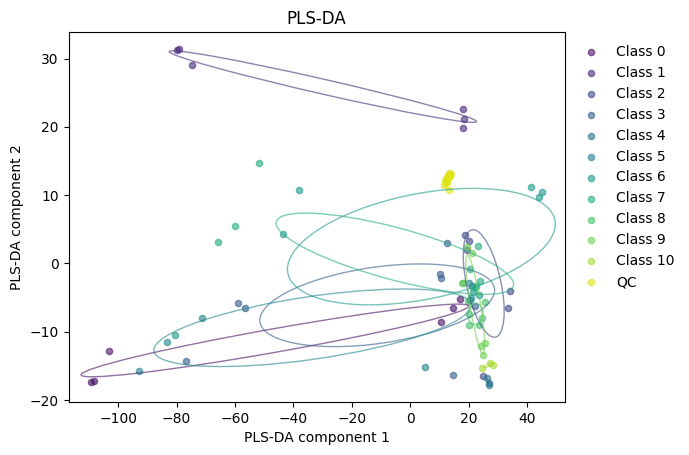

(<Figure size 640x480 with 1 Axes>,
 <Axes: title={'center': 'PLS-DA'}, xlabel='PLS-DA component 1', ylabel='PLS-DA component 2'>)

In [30]:
# Visualize the PLS-DA
wf.visualizer_PLSDA(cmap = 'viridis', plt_name_suffix = 'PLSDA-Type2')

In [31]:
# Perform PLS-DA with different response column
wf.statistics_PLSDA(response_column_names='Type')

R2: 0.596219847204005
Q2:
QC-IS     0.493333
Type 0    0.603628
Type 1    0.696528
dtype: float64


/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:4006: FutureWarning: The behavior of DataFrame.var with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return var(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


PLSRegression()

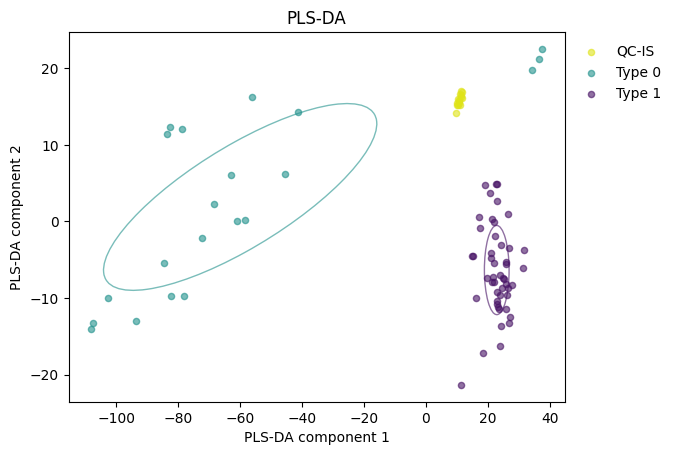

(<Figure size 640x480 with 1 Axes>,
 <Axes: title={'center': 'PLS-DA'}, xlabel='PLS-DA component 1', ylabel='PLS-DA component 2'>)

In [32]:
# Visualize the PLS-DA
wf.visualizer_PLSDA(cmap='viridis_r', plt_name_suffix = 'PLSDA-Type')

In [33]:
#Perform PLS-DA with multiple response columns (their combination)
wf.statistics_PLSDA(response_column_names=['Type 2', 'Type'])

R2: 0.014442524614942824
Q2:
Class 0_Type 0    -0.447835
Class 0_Type 1    -0.447835
Class 10_Type 1   -0.447835
Class 1_Type 0    -0.447835
Class 1_Type 1    -0.447835
Class 2_Type 1     0.248239
Class 3_Type 0    -0.447835
Class 3_Type 1     0.248239
Class 4_Type 1    -0.447835
Class 5_Type 0    -0.447835
Class 5_Type 1    -0.447835
Class 6_Type 0     0.248239
Class 6_Type 1    -0.447835
Class 7_Type 0    -0.447835
Class 7_Type 1     0.248239
Class 8_Type 1     0.248239
Class 9_Type 1     0.248239
QC_QC-IS           0.660073
dtype: float64


/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:4006: FutureWarning: The behavior of DataFrame.var with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return var(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


PLSRegression()

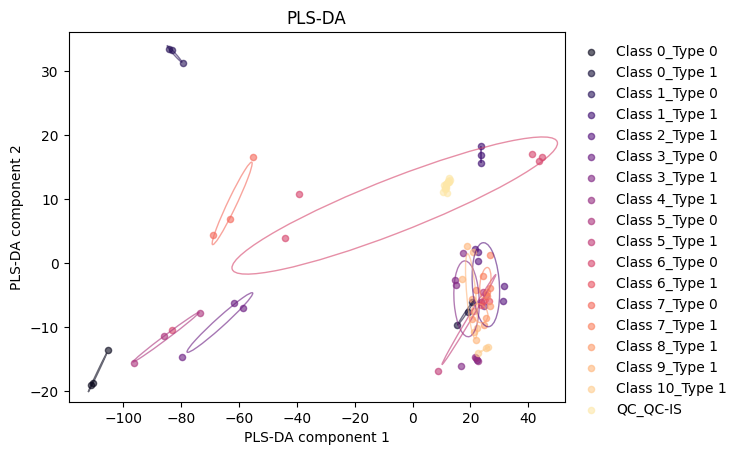

(<Figure size 640x480 with 1 Axes>,
 <Axes: title={'center': 'PLS-DA'}, xlabel='PLS-DA component 1', ylabel='PLS-DA component 2'>)

In [34]:
# Visualize the PLS-DA
wf.visualizer_PLSDA(cmap='magma', plt_name_suffix = 'PLSDA-Type2-Type')

### Violin plots

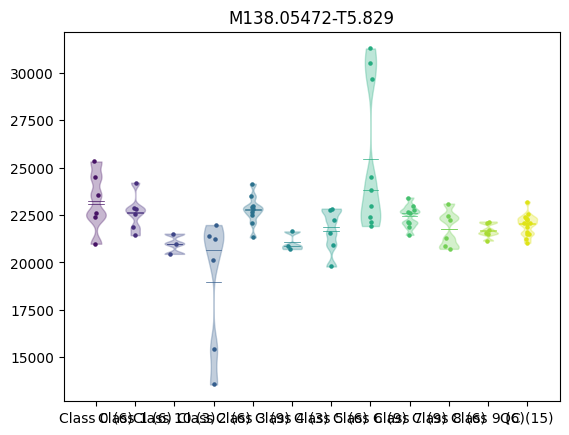

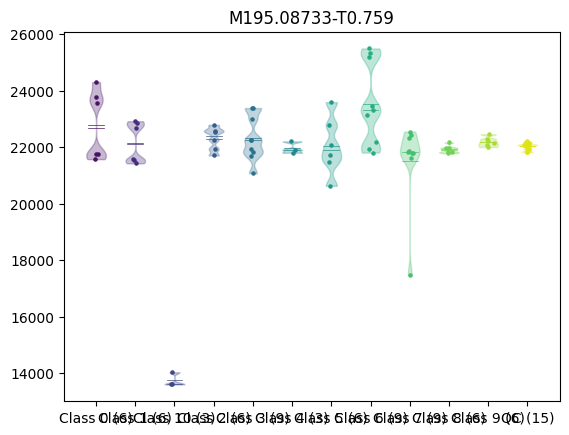

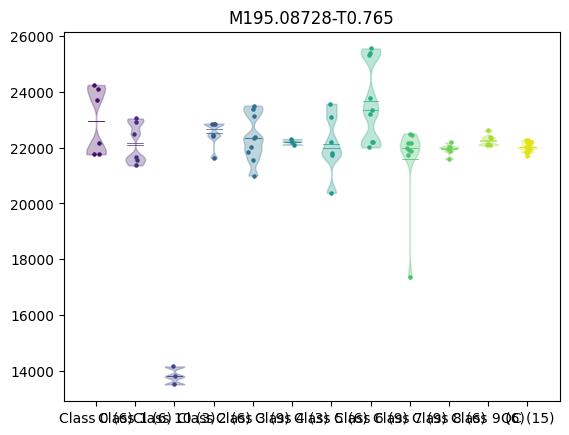

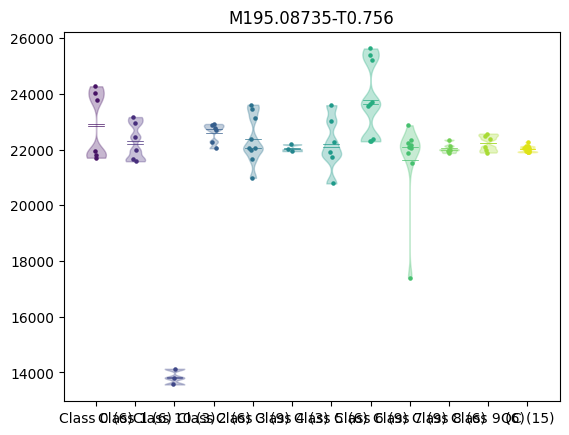

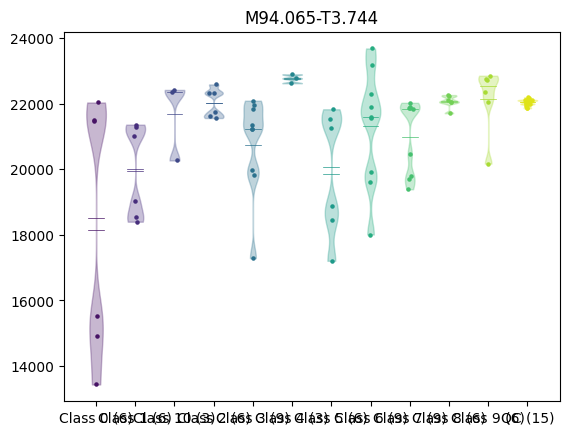

Violin plots created: 100.00%


{'bodies': [<matplotlib.collections.FillBetweenPolyCollection at 0x7afa4a200450>,
  <matplotlib.collections.FillBetweenPolyCollection at 0x7afa462c4110>]}

In [35]:
# Visualize features as violin plots
wf.visualizer_violin_plots(column_names='Type 2', indexes = [0, 1, 2, 3, 4], save_into_pdf=False, save_first=True, cmap='viridis', plt_name_suffix='violin_plots-Type2')

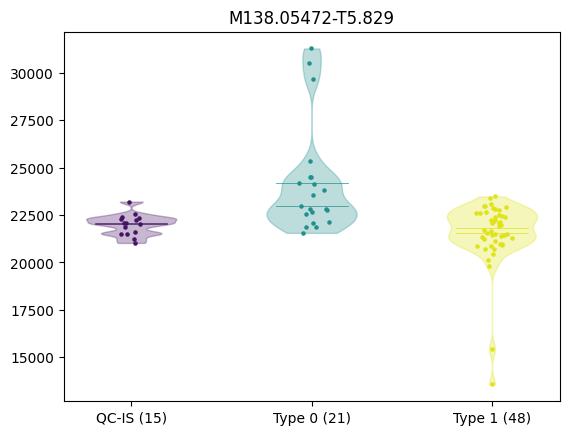

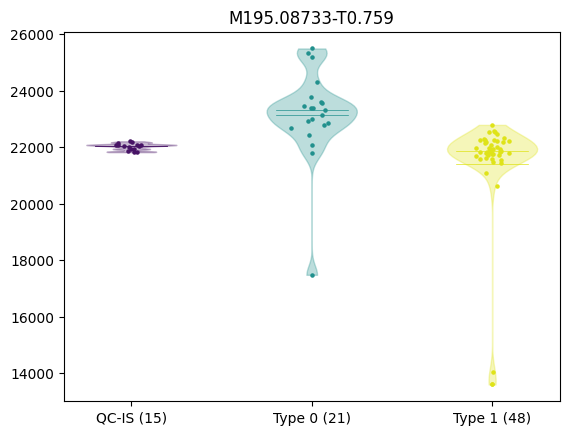

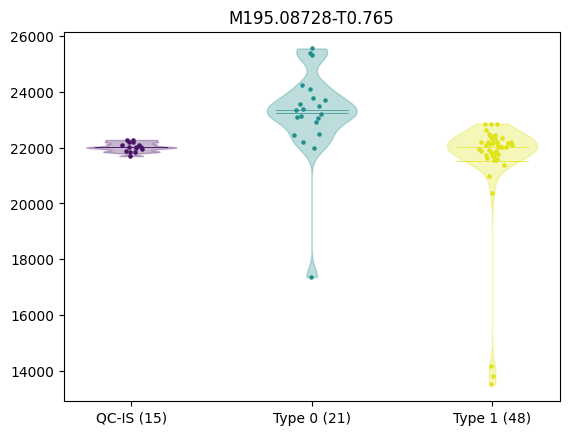

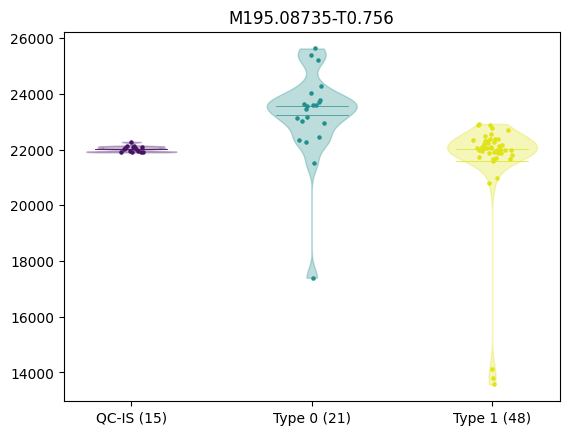

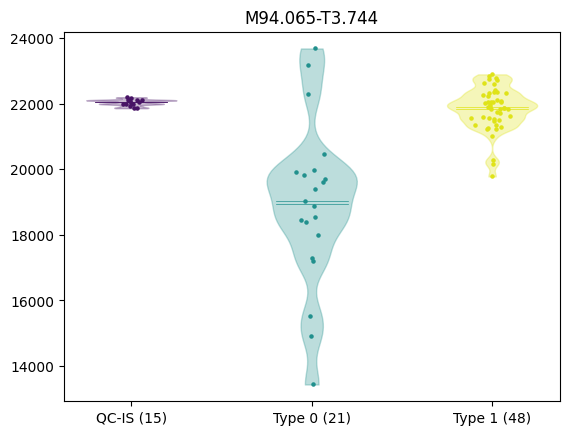

Violin plots created: 100.00%


{'bodies': [<matplotlib.collections.FillBetweenPolyCollection at 0x7afa45f70210>,
  <matplotlib.collections.FillBetweenPolyCollection at 0x7afa45fc7b50>]}

In [36]:
# Visualize features as violin plots with different grouping column
wf.visualizer_violin_plots(column_names='Type', indexes = [0, 1, 2, 3, 4], save_into_pdf=False,  save_first=True, cmap='viridis', plt_name_suffix='violin_plots-Type')

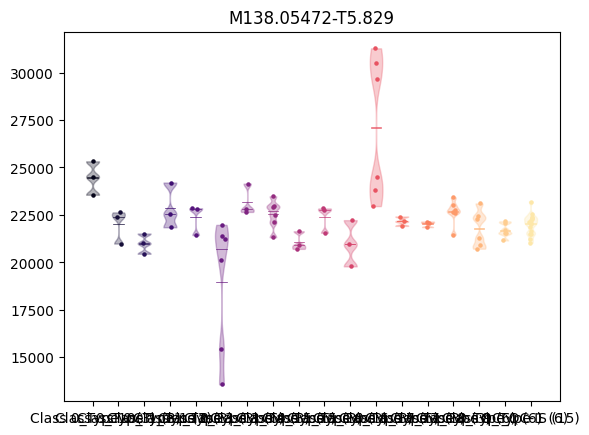

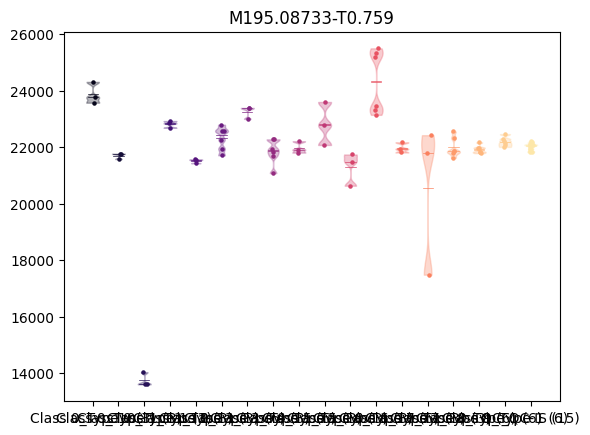

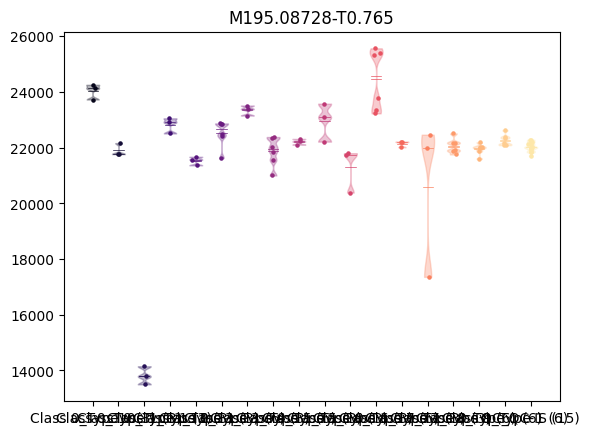

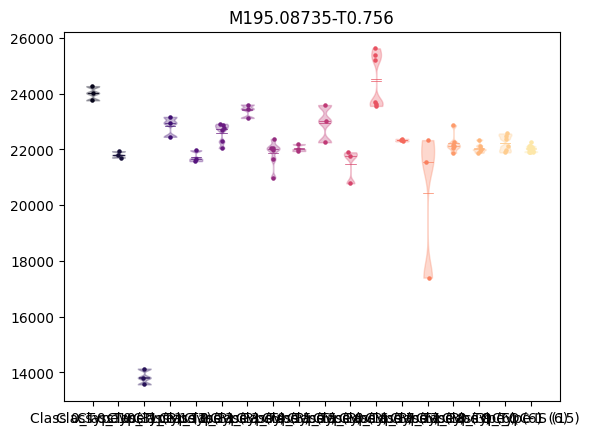

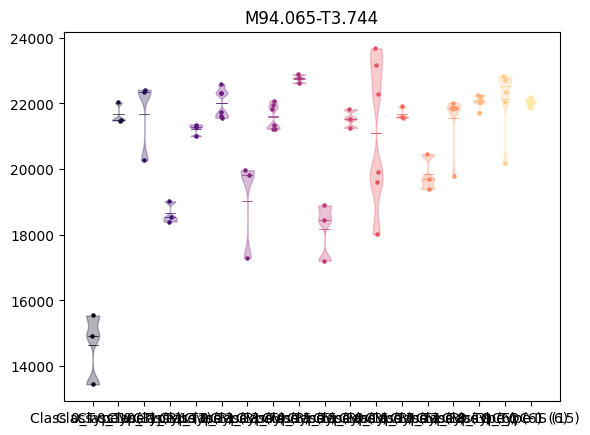

Violin plots created: 100.00%


{'bodies': [<matplotlib.collections.FillBetweenPolyCollection at 0x7afa45f40410>,
  <matplotlib.collections.FillBetweenPolyCollection at 0x7afa45f9cfd0>]}

In [37]:
# Visualize features as violin plots with combination of grouping columns
wf.visualizer_violin_plots(column_names=['Type 2', 'Type'], indexes = [0, 1, 2, 3, 4], save_into_pdf=False, save_first=True, cmap='magma', plt_name_suffix='violin_plots-Type2-Type')

### Printing out candidate variables features (compounds)

In [38]:
print(wf.candidate_variables)

[['PCA-Loadings', ['M122.92444-T5.316', 'M235.14406-T3.817', 'M290.84685-T5.318', 'M206.88568-T5.317', 'M124.92241-T5.315', 'M265.01523-T8.495', 'M407.07356-T3.314', 'M208.88366-T5.309', 'M347.09425-T6.597', 'M225.98643-T8.501', 'M458.76933-T5.319', 'M542.73059-T5.319', 'M374.80805-T5.318', 'M587.15328-T5.788']], ['PLS-DA vips', 241       M151.1227-T2.55
368     M254.16085-T4.511
369     M253.15445-T4.539
419     M260.16019-T6.229
589     M383.20302-T7.028
940     M217.15447-T5.644
991     M261.14431-T6.365
1172    M227.10224-T7.197
1241    M226.15478-T5.036
1276    M247.12873-T6.356
1357    M212.10434-T6.625
1553    M265.12183-T6.769
1579    M351.17564-T6.388
1746     M152.0564-T4.159
Name: cpdID, dtype: object], ['PLS-DA vips', 234       M260.1604-T6.35
419     M260.16019-T6.229
530     M219.13395-T6.326
542     M260.19634-T7.099
585     M189.12329-T6.049
648     M246.14459-T6.692
991     M261.14431-T6.365
1087    M217.15437-T7.353
1163    M246.14469-T6.374
1501    M275.13441-T7.568


## Final touches

In [39]:
# Finalize report
wf.finalizer_report()

Report was finalized and is ready for viewing.
